# Advanced exploratory data analysis (EDA)-for the secondary dataset

### Data Collection Method:

The dataset used for this project was sourced from Kaggle under the title “Social Media and Mental Health”.
Date of collection in 4/18/2022

### Goal of collecting this dataset:
The primary objective of using this secondary dataset is to study if we will encounter any different
results between the analysis this dataset and our primary
dataset and to acknowledge if there any factor causes these result's 


### Source of dataset:
https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health


# 1. Structure Investigation



 for pandas in its next major release (pandas 3.0) we need to install pyarrow



In [54]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df_X = pd.read_csv('SecondaryData.csv')


#### General information about the dataset:
##### Number of attributes: 21
##### No. of objects: 481
##### Class lable: Social Media Usage (Yes/No)

So we know that this dataset has 481 samples and 21 features. And how many different data types do these 21 features contain?


In [4]:
import pandas as pd

# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

C:\Users\razan\AppData\Local\Temp\ipykernel_40016\805639531.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_X.dtypes)


int64      12
object      8
float64     1
Name: count, dtype: int64

In [7]:
num_attributes = len(df_X.columns)
attribute_types = df_X.dtypes.to_frame().rename(columns={0: 'Data Types'})
num_objects = len(df_X)
class_name = df_X.columns[-1]  

text3= "Number of attributes:"
bold_text3 = "\033[1m" + text3 + "\033[0m"
print(bold_text3, num_attributes)
print("\n")

text4= "Attribute types:"
bold_text4 = "\033[1m" + text4 + "\033[0m"
print(bold_text4)
print(attribute_types)
print("\n")

text5= "Number of objects:"
bold_text5 = "\033[1m" + text5 + "\033[0m"
print(bold_text5, num_objects)
print("\n")

Number of attributes: 21


Attribute types:
                                                   Data Types
Timestamp                                              object
1. What is your age?                                  float64
2. Gender                                              object
3. Relationship Status                                 object
4. Occupation Status                                   object
5. What type of organizations are you affiliate...     object
6. Do you use social media?                            object
7. What social media platforms do you commonly ...     object
8. What is the average time you spend on social...     object
9. How often do you find yourself using Social ...      int64
10. How often do you get distracted by Social m...      int64
11. Do you feel restless if you haven't used So...      int64
12. On a scale of 1 to 5, how easily distracted...      int64
13. On a scale of 1 to 5, how much are you both...      int64
14. Do you find it difficu

### Attributes’ description table:

| Attribute Name                                         | Description                                                                                     | Data Type     | Possible Values                      |
|:------------------------------------------------------|:-----------------------------------------------------------------------------------------------|:-------------:|:-------------------------------------:|
| Timestamp                                             | Represents the date and time of the response.                                                 | Object        | Continuous datetime values            |
| What is your age?                                    | Represents the age of the respondents.                                                         | Numeric       | 0 to 120 (float64)                   |
| Gender                                               | Represents the gender of the respondents.                                                     | Categorical   | "Male", "Female", "Non-binary"       |
| Relationship Status                                   | Indicates the relationship status of the respondents.                                         | Categorical   | "Single", "Married", "In a relationship", "Divorced" |
| Occupation Status                                     | Represents the employment status of the respondents.                                          | Categorical   | "Employed", "Unemployed", "Student", "Retired" |
| Type of Organizations Affiliated                     | Indicates the types of organizations the respondents are affiliated with.                     | Categorical   | Various organization types (e.g., "Non-profit", "Corporate") |
| Do you use social media?                              | Indicates whether the respondents use social media.                                           | Categorical   | "Yes", "No"                          |
| What social media platforms do you commonly use?     | Lists the social media platforms frequently used by respondents.                               | Categorical   | Various platforms (e.g., "Facebook", "Twitter", "Instagram") |
| What is the average time you spend on social media?   | Represents the average time spent on social media per day.                                    | Numeric       | Continuous numerical values (hours)   |
| How often do you find yourself using Social Media?    | Indicates the frequency of social media usage.                                                | Numeric       | Likert scale (1 to 5)                |
| How often do you get distracted by Social Media?      | Measures how often respondents get distracted while using social media.                        | Numeric       | Likert scale (1 to 5)                |
| Do you feel restless if you haven't used Social Media? | Indicates if respondents feel uneasy without social media usage.                               | Numeric       | Likert scale (1 to 5)                |
| On a scale of 1 to 5, how easily distracted are you?  | Measures the ease of distraction while using social media.                                     | Numeric       | Likert scale (1 to 5)                |
| On a scale of 1 to 5, how much are you both on and off social media? | Measures the balance between online and offline presence.                                     | Numeric       | Likert scale (1 to 5)                |
| Do you find it difficult to concentrate on tasks?     | Indicates whether respondents struggle to focus on tasks due to social media.                  | Numeric       | Likert scale (1 to 5)                |
| On a scale of 1-5, how often do you compare yourself to others? | Measures the frequency of social comparison related to social media usage.                    | Numeric       | Likert scale (1 to 5)                |
| Following the previous question, how do you feel about social media's impact? | Measures the perceived impact of social media on self-esteem or mental health.                | Numeric       | Likert scale (1 to 5)

## 1.1. Structure of non-numerical features

Data types can be numerical and non-numerical. First, let's take a closer look at the **non-numerical** entries.

In [58]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,Timestamp,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?
0,4/18/2022 19:18:47,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours
1,4/18/2022 19:19:28,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours
2,4/18/2022 19:25:59,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours
3,4/18/2022 19:29:43,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours
4,4/18/2022 19:33:31,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours


Using the `.describe()` function we can also investigate how many unique values each non-numerical feature has and with which frequency the most prominent value is present.

In [59]:
df_X.describe(exclude="number")

,Timestamp,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?
count,481,481,481,481,451,481,481,481
unique,480,9,4,4,18,2,125,6
top,5/11/2022 22:54:32,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours
freq,2,263,285,292,239,478,35,116


## 1.2. Structure of numerical features

Next, let's take a closer look at the numerical features. More precisely, let's investigate how many unique values each of these feature has. This process will give us some insights about the number of **binary** (2 unique values), **ordinal** (3 to ~10 unique values) and **continuous** (more than 10 unique values) features in the dataset.

In [60]:
pip install matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


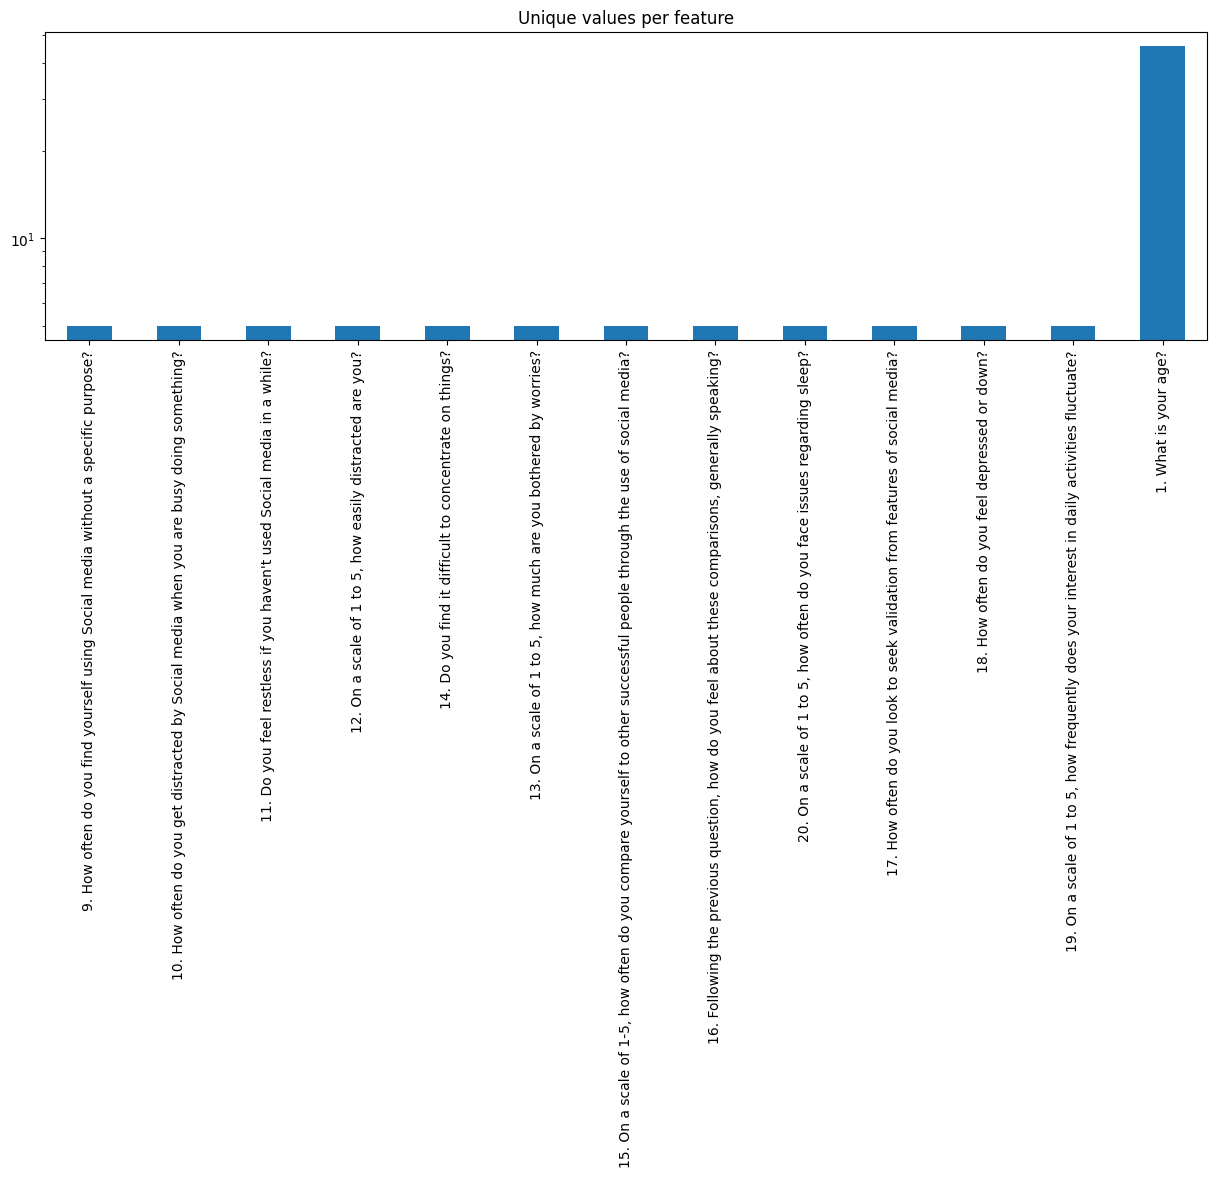

In [10]:
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

## 1.3. Conclusion of structure investigation
At the end of this first investigation, we now have a clearer understanding of the general structure of our dataset. Here's a summary of the insights gathered:

Key Findings:
Number of Samples (Objects): 481

Number of Features (Attributes): 21

Data Types of Features:

12 integer (int64) features
8 object (categorical/text) features
1 floating-point (float64) feature
Feature Types Breakdown:

- Binary Features (Yes/No): Features like "Do you use social media?" are binary.
- Ordinal Features (Likert Scales): Several questions are on a 1-5 Likert scale, such as "How easily distracted are you?" (ordinal data).
- Categorical Features: Include gender, relationship status, occupation, and social media platforms used (e.g., Facebook, Instagram).
- Continuous Feature: The only continuous feature is "What is your age?" (float64), which has a range of numeric values.

# 2. Quality Investigation

Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

## 2.1. Duplicates

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which you might want to ignore first.

In [11]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Timestamp"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


This column often represents the time when the data was collected. Since our analysis does not focus on time-based trends, we can ignore the Timestamp column. It's not directly relevant unless we analyze patterns over time.

## 2.2. Missing values

Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

### 2.2.1. Per sample

To look at number of missing values per sample we have multiple options. The most straight forward one is to simply visualize the output of `df_X.isna()`, with something like this:

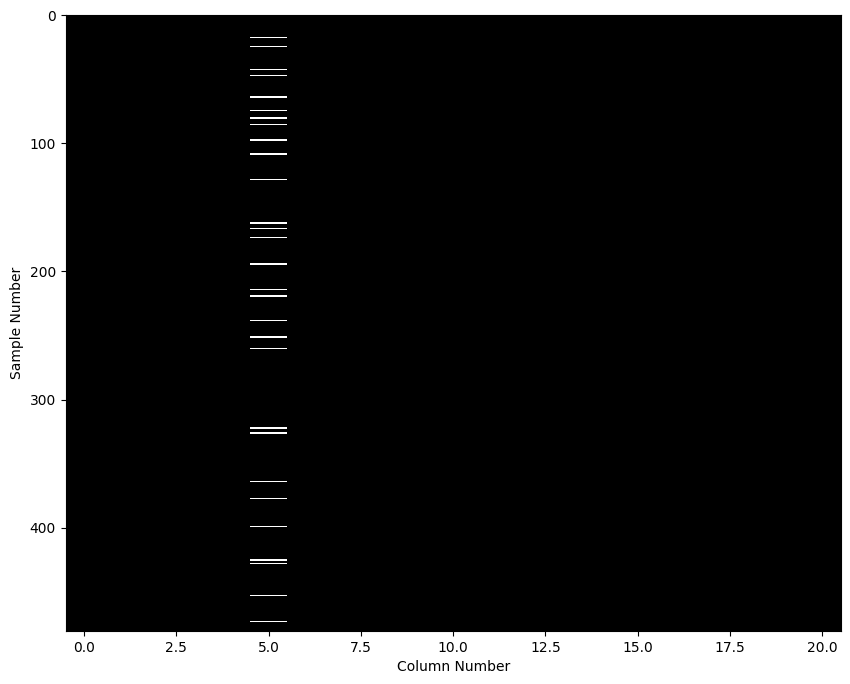

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value. While this is already a useful plot, an even better approach is to use the [missingno](https://github.com/ResidentMario/missingno) library, to get a plot like this one:

In [14]:
pip install missingno

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
    --------------------------------------- 1.0/44.5 MB 2.3 MB/s eta 0:00:20
   - -------------------------------------- 1.8/44.5 MB 2.7 MB/s eta 0:00:16
   -- ------------------------------------- 2.6/44.5 MB 3.0 MB/s eta 0:00:14
   -- ------------------------------------- 3.1/44.5 MB 2.9 MB/s eta 0:00:15
   --- ------------------------------------ 3.7/44.5 MB 2.8 MB/s eta 0:00:15
   --- ------------------------------------ 4.2/44.5 MB 2.8 MB/s eta 0:00:15
   ---- ----------------------------------- 5.0/44.5 MB 2.9 MB/s eta 0:00:14
   ---- ----------------------------------- 5.5/44.5 MB 2.9 MB/s eta 0:00:14
   ----- ---------------------------------- 6.0/44.5 MB 2.9 MB/s eta 0:00:14
   ----- ---------------------------------- 6.3/44.5 MB 2.7 MB/s eta 0:00:14
   ----- -----------

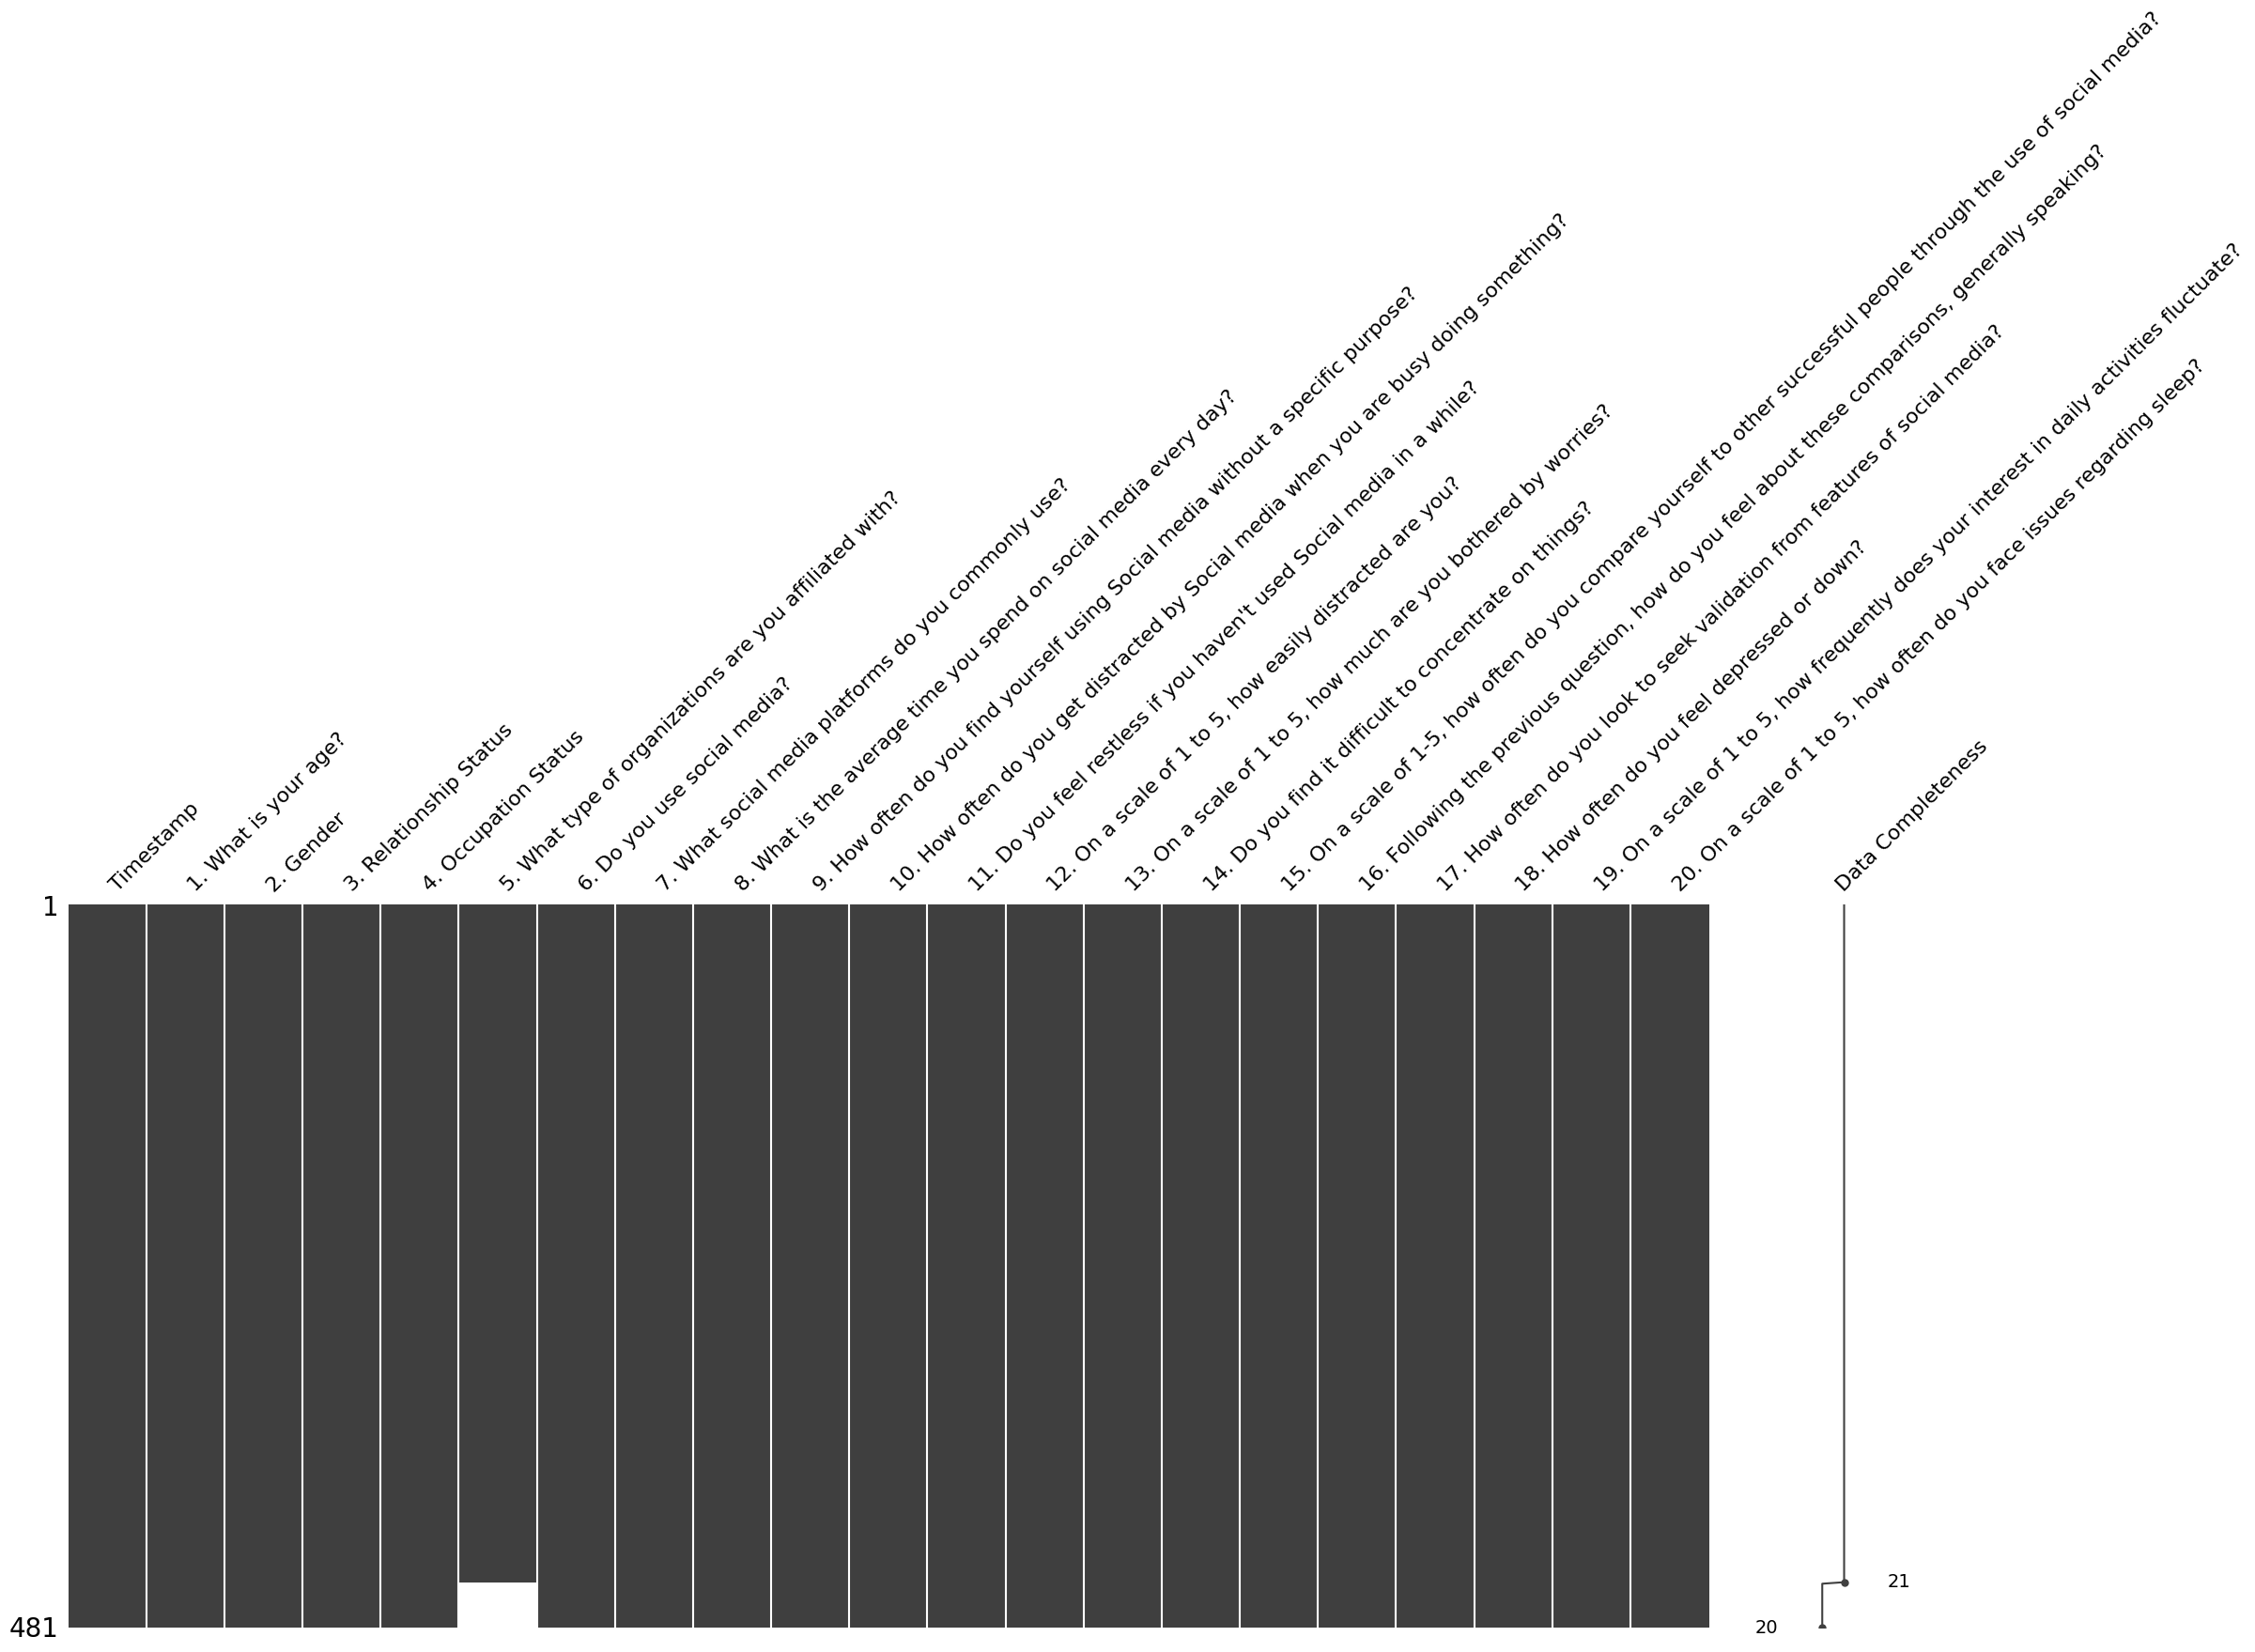

In [15]:
#!pip install missingno  # Only run this once if you don't have missingno installed

import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [13]:
missing_values = df_X.isna()

missing_counts = missing_values.sum();

rows_with_missing = df_X[df_X.isna().any(axis=1)];

print("Missing values in each column:");
print(missing_counts);
print("\nRows with missing values:");
print(rows_with_missing);

Missing values in each column:
Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                         

In our dataset, we identified missing values in the column "What type of organizations are you affiliated with?":

Total number of samples: 481
Missing values in this column: 30
Percentage of missing values: 6.23%
Conclusion:
Given that approximately 6.23% of the values in the column are missing, we have chosen to drop the samples with missing data in this feature. This decision is justified as the missing values represent a small portion of the overall dataset (30 samples), and removing them will help maintain the integrity of our analysis without introducing any potential bias from imputation. After this step, we will proceed with the remaining 451 samples for further analysis.

In [16]:
df_cleaned = df_X.dropna(subset=["5. What type of organizations are you affiliated with?"])


### 2.2.2. Per Feature

As a next step, let's now look at the number of missing values per feature. For this we can use some `pandas` trickery to quickly identify the ratio of missing values **per feature**.

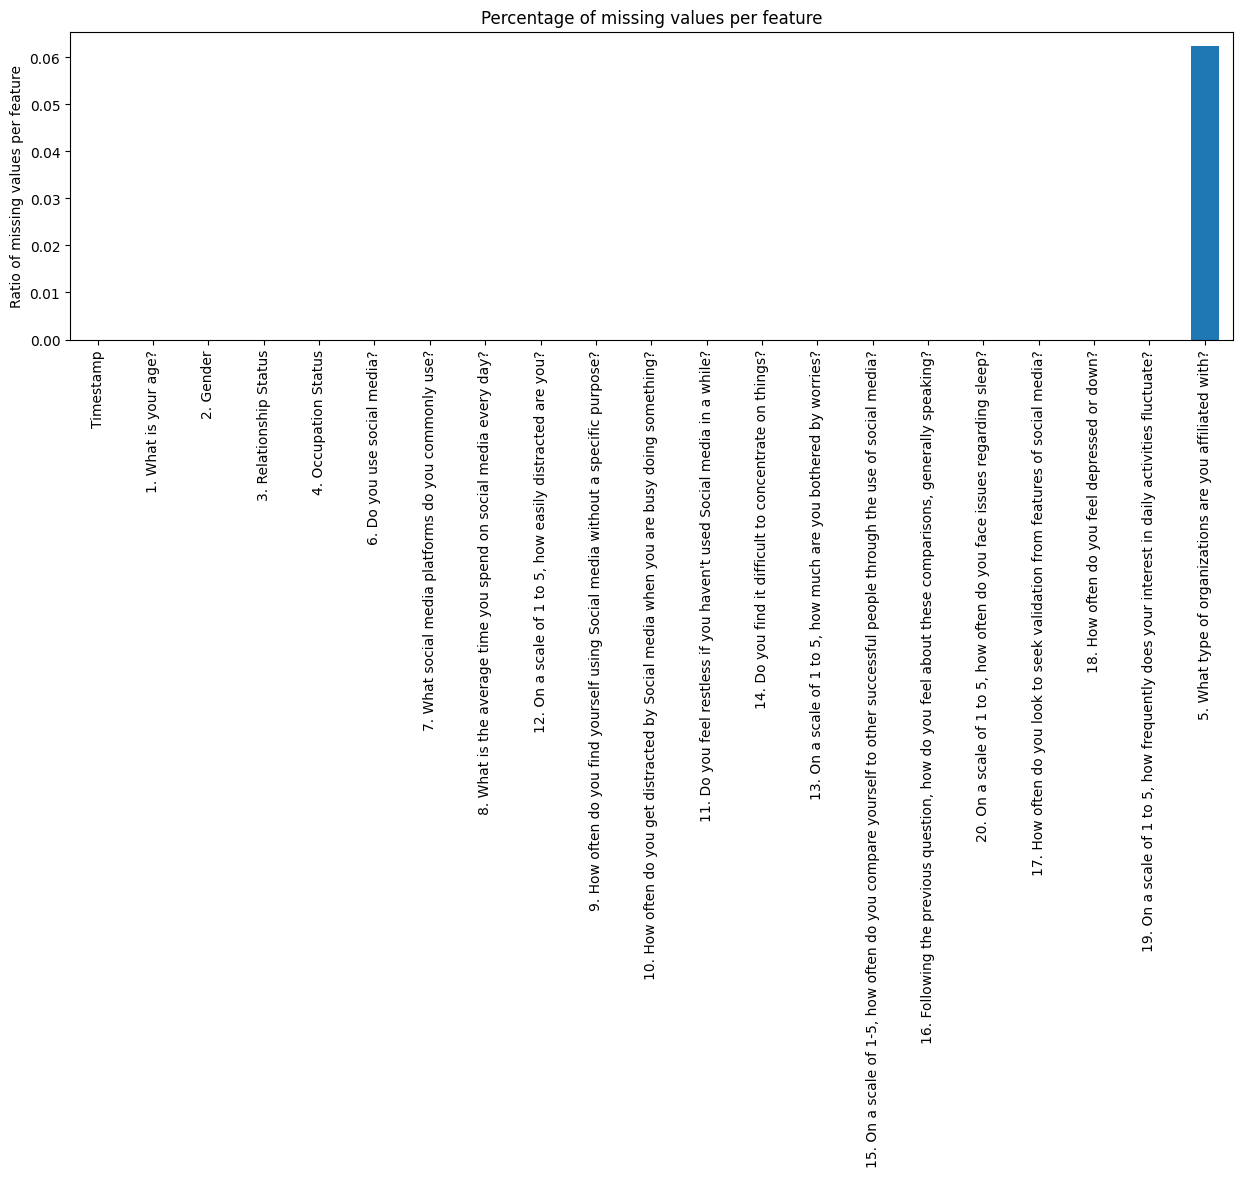

In [17]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

We have previously identified that only one feature, "What type of organizations are you affiliated with?", contains missing values. Out of the 481 samples, 30 values are missing, which accounts for approximately 6.23% of the data in this column. Given this small proportion, we decided to remove the rows with missing values to maintain the integrity of the dataset, ensuring that our analysis remains robust and accurate.

## 2.3. Unwanted entries and recording errors

Another source of quality issues in a dataset can be due to unwanted entries or recording errors. It's important to distinguish such samples from simple outliers. While outliers are data points that are unusual for a given feature distribution, **unwanted entries or recording errors are samples that shouldn't be there in the first place**.

For example, a temperature recording of 45°C in Switzerland might be an outlier (as in 'very unusual'), while a recording at 90°C would be an error. Similarly, a temperature recording from the top of Mont Blanc might be physical possible, but most likely shouldn't be included in a dataset about Swiss cities.

Of course, detecting such errors and unwanted entries and distinguishing them from outliers is not always straight forward and depends highly on the dataset. One approach to this is to take a global view on the dataset and see if you can identify some very unusual patterns.

### 2.3.1. Numerical features
To plot this global view of the dataset, at least for the numerical features, you can use pandas' `.plot()` function and combine it with the following parameters:

- `lw=0`: `lw` stands for line width. `0` means that we don't want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use `.` as markers for each data point
- `subplots=True`: `subplots` tells `pandas` to plot each feature in a separate subplot
- `layout=(-1, 4)`: This parameter tells `pandas` how many rows and columns to use for the subplots. The `-1` means "as many as needed", while the `2` means to use 2 columns per row.
- `figsize=(15, 30), markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the `markersize` accordingly.

So what does this plot look like?

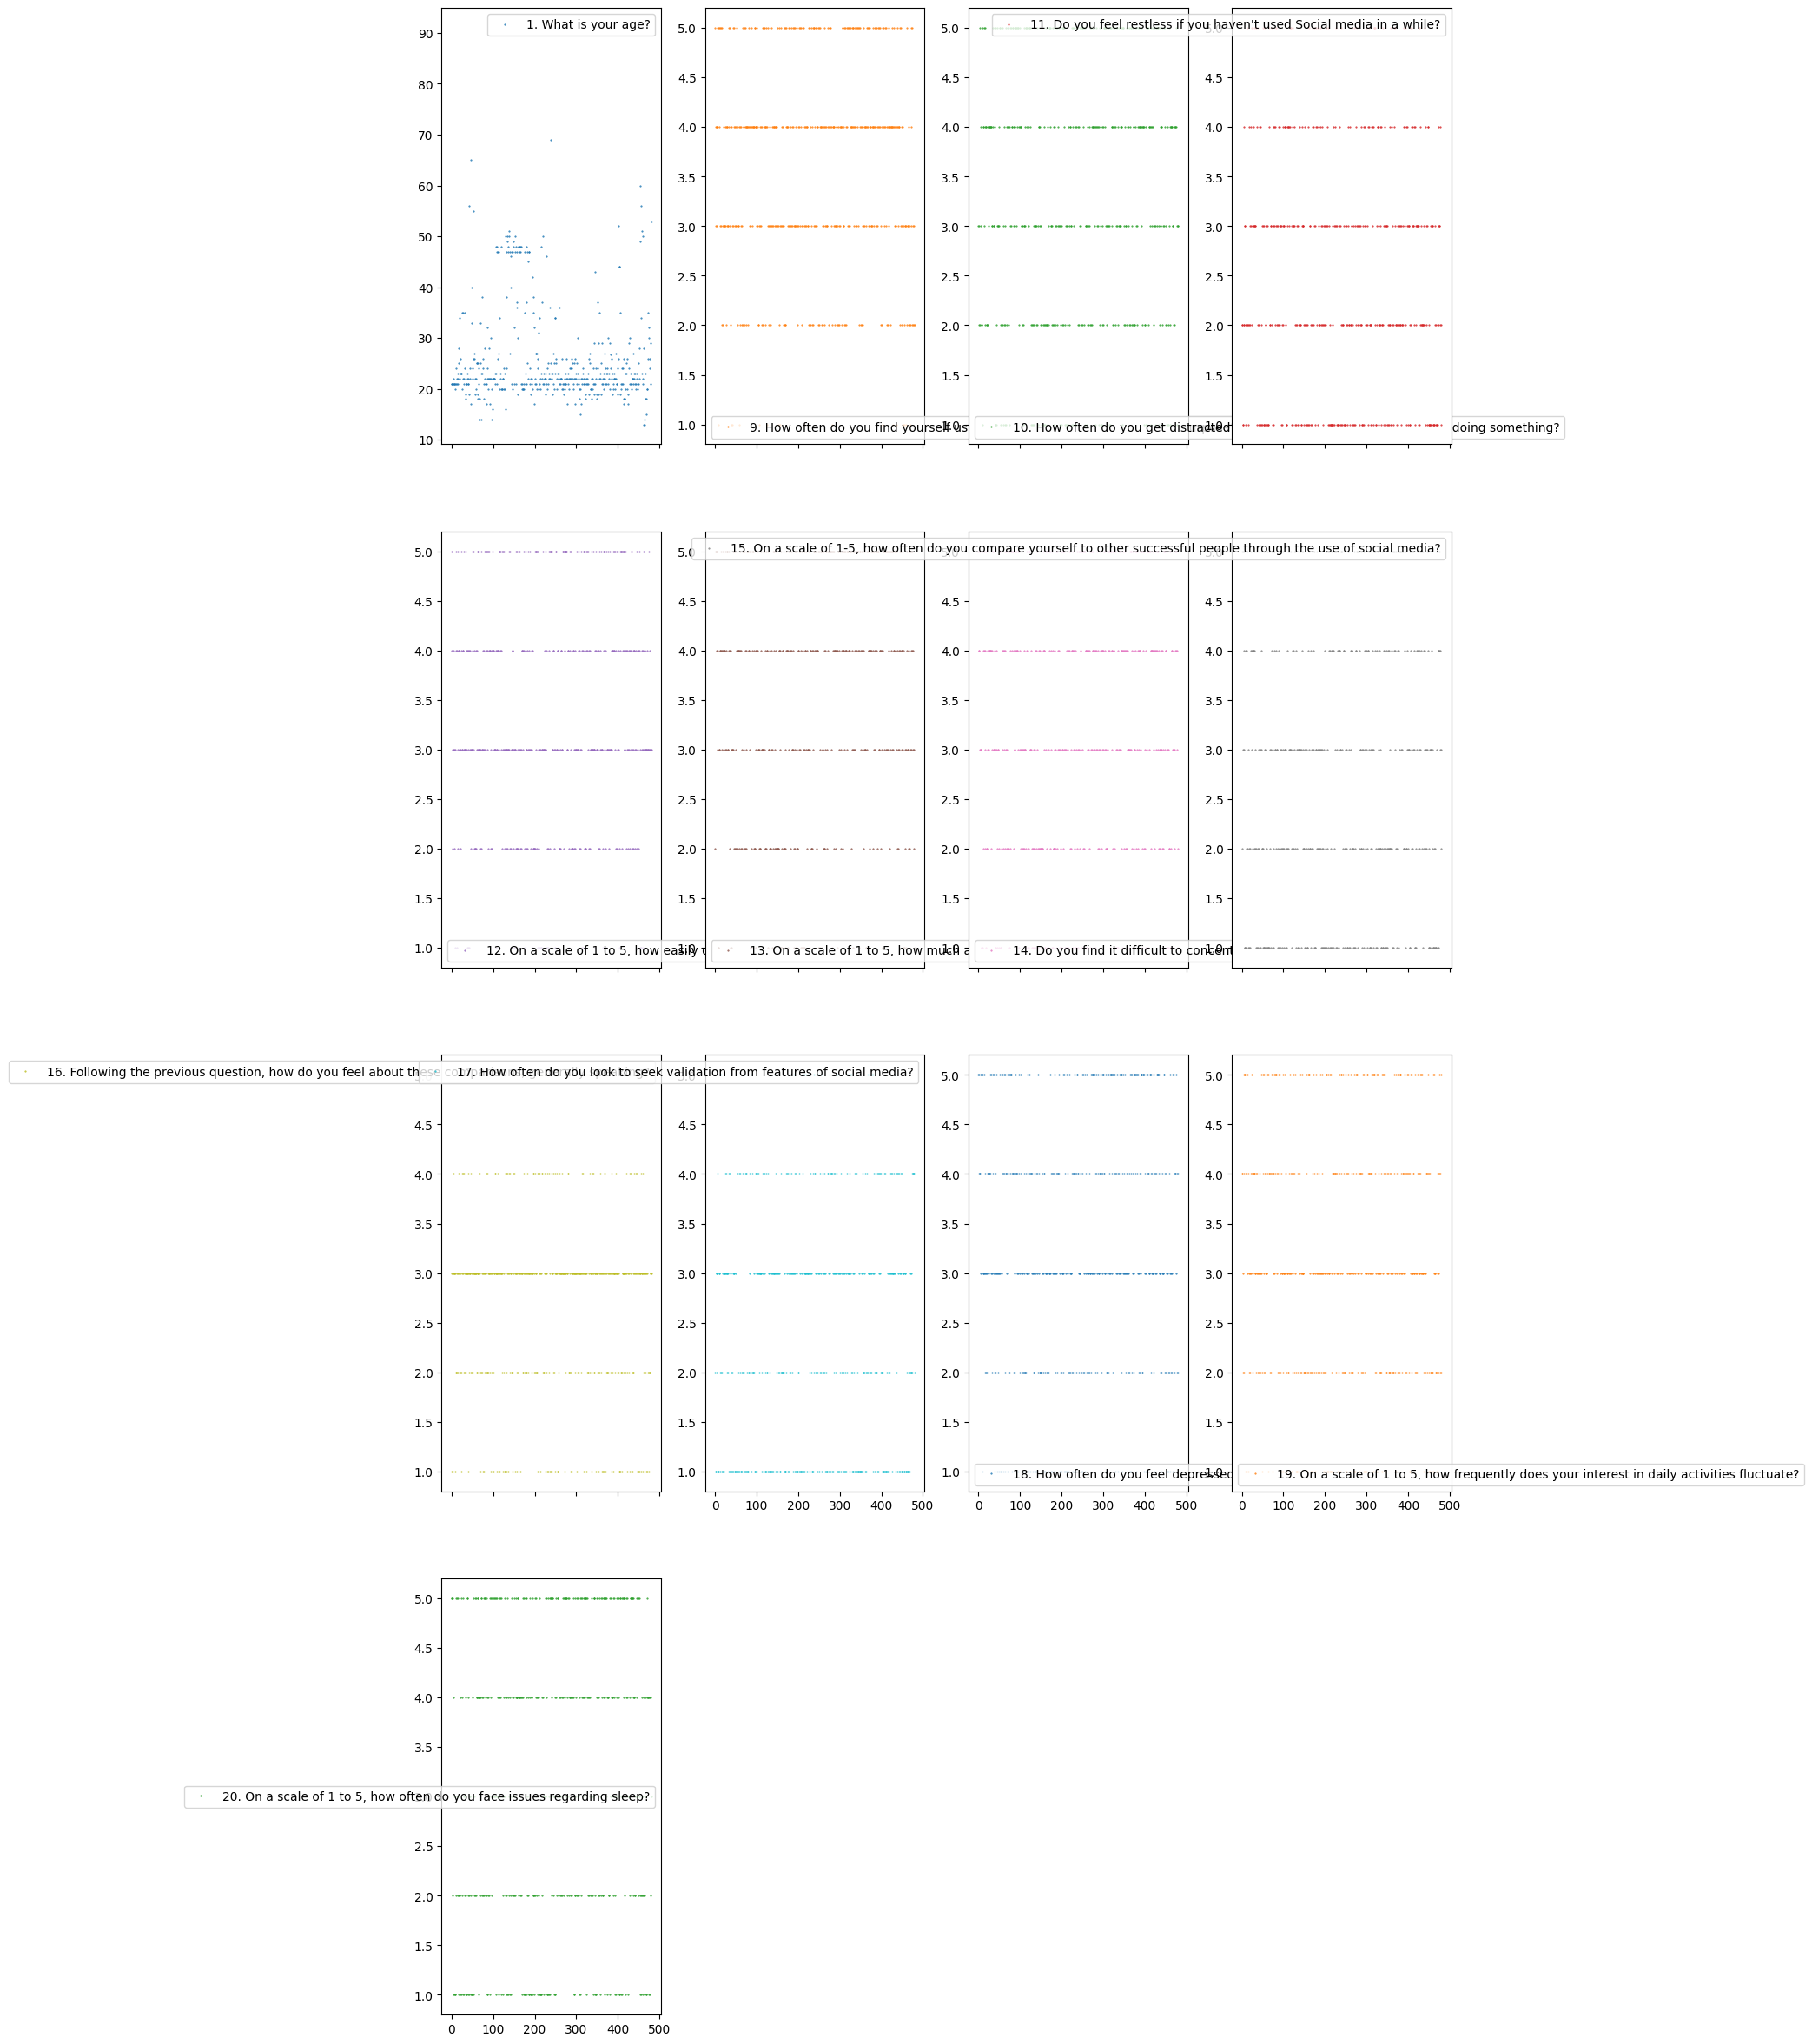

In [18]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index

### 2.3.2. Non-numerical features

Identifying **unwanted entries** or **recording errors** on non-numerical features is a bit more tricky. Given that at this point, we only want to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

In [19]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

,Timestamp,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?
count,481,481,481,481,451,481,481,481
unique,480,9,4,4,18,2,125,6
top,5/11/2022 22:54:32,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours
freq,2,263,285,292,239,478,35,116


becuse There are multiple ways for how you could potentially streamline the quality investigation for each individual non-numerical features. None of them is perfect we wanted to Create bar plots for categorical features to visualize the distribution of values. This can help identify outliers or rare categories.

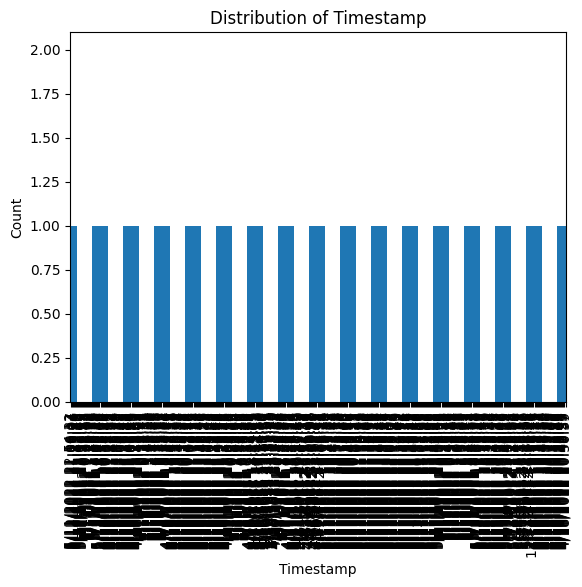

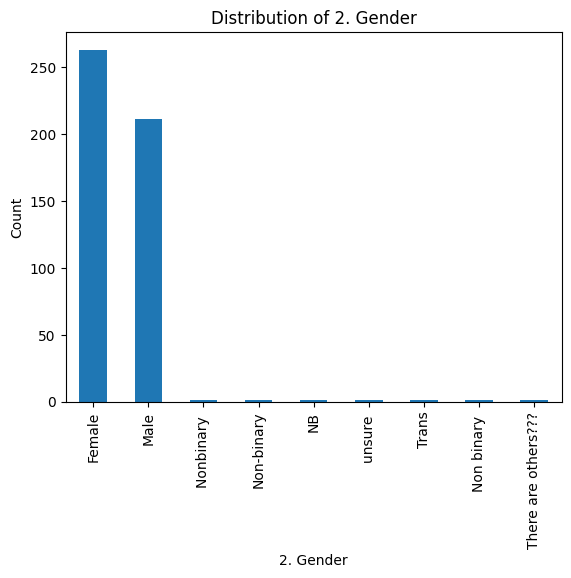

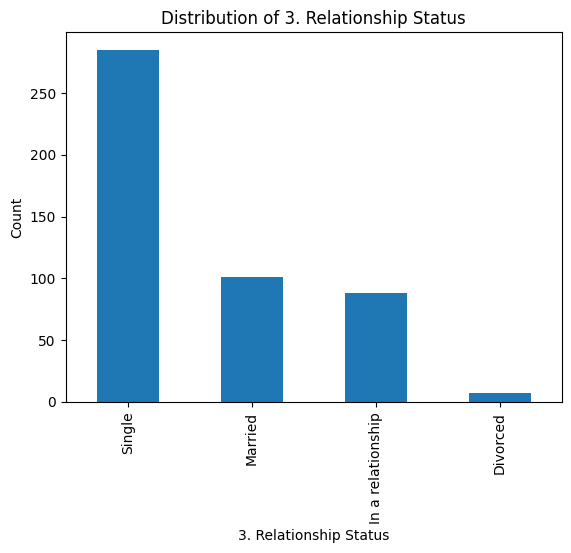

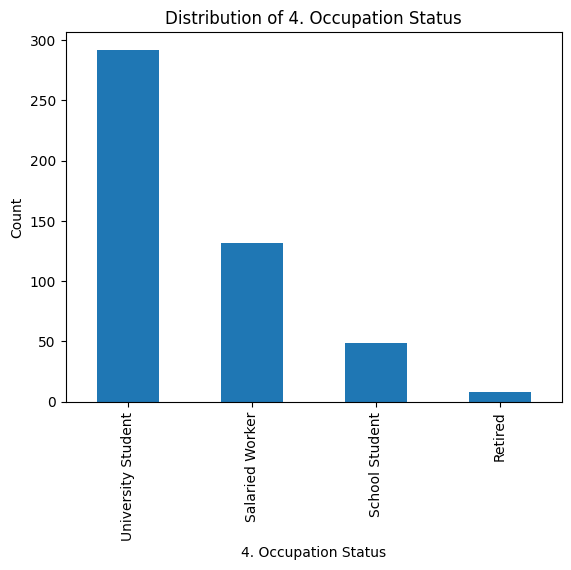

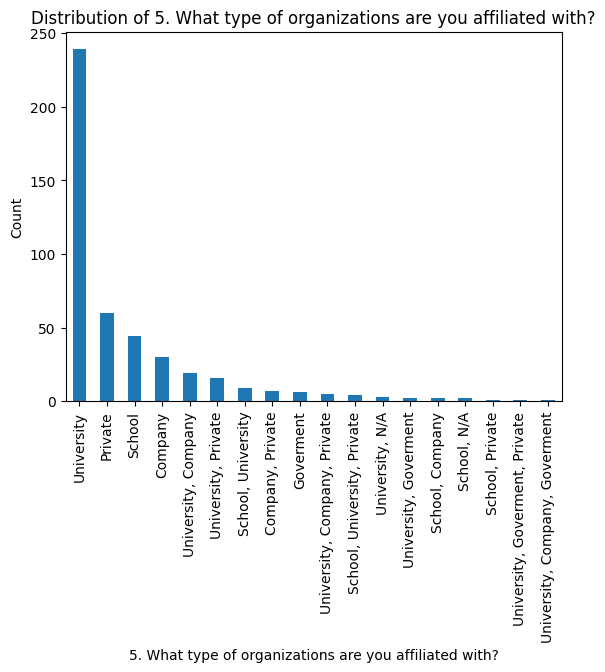

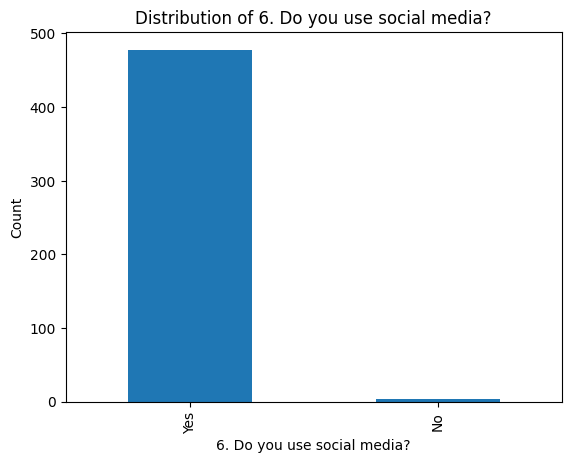

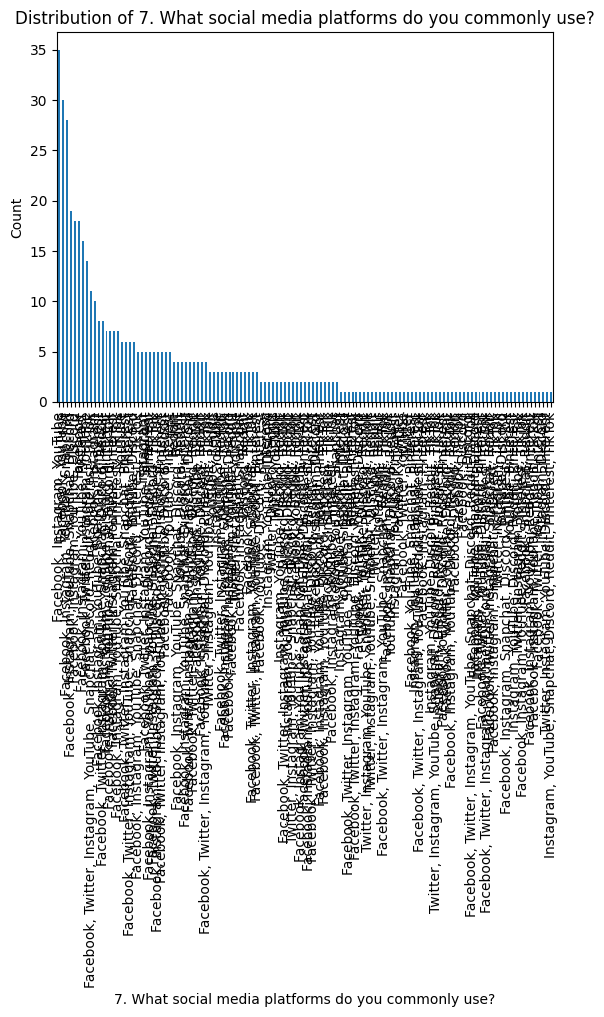

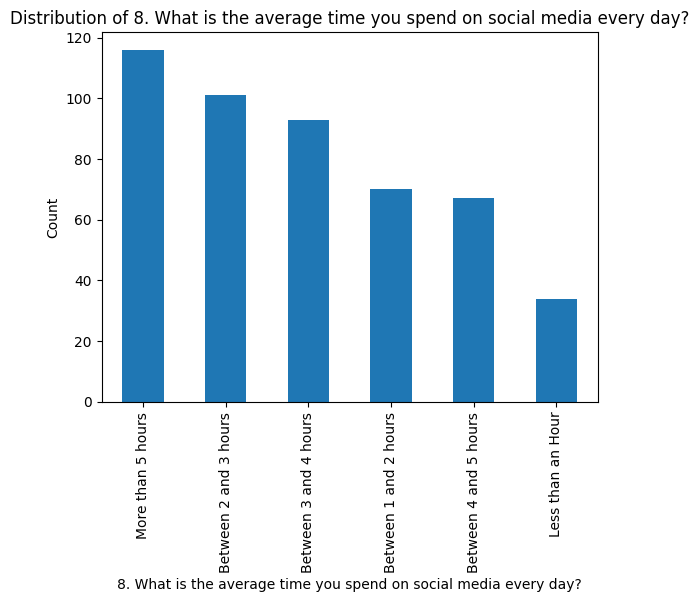

In [23]:
import matplotlib.pyplot as plt

for column in df_X.select_dtypes(include=['object']).columns:
    df_X[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


##### I liked our choice because it made it clear that we had unwanted values, such as the number of different genders, and in order to clean this from our data, the data rows that contain any entry in gender other than male and female will be deleted.

In [45]:
# Define the valid gender values
valid_genders = ['Male', 'Female']

# Filter the DataFrame to only include valid gender entries
df_cleaned = df_X[df_X['2. Gender'].isin(valid_genders)]

# Optionally, check how many rows were removed
rows_removed = len(df_X) - len(df_cleaned)
print(f"Removed {rows_removed} rows with unwanted gender values.")


Removed 7 rows with unwanted gender values.


###2.4.Conclusion of Quality Investigation

In conclusion, this second investigation has provided us with valuable insights into the overall quality of our dataset. We thoroughly examined aspects such as duplicates, missing values, and potential recording errors. It is crucial to note that while we identified these issues, we have yet to discuss strategies for addressing the remaining missing values or outliers. This aspect will be the focus of our next investigation, which will not be covered in this article.

##3. Content Investigation
Having assessed the general structure and quality of the dataset, we will now delve deeper into the actual content. Ideally, this investigation would be performed feature by feature. However, with over 20-30 features present, this approach can become unwieldy.

To streamline the process while maintaining effectiveness, we will explore three different strategies that will provide a quick overview of the content stored in each feature and their interrelations.


## 3.1. Feature distribution
Examining the distribution of values across each feature is a highly effective way to gain a better understanding of the content within the dataset. This analysis not only guides our exploratory data analysis (EDA) but also yields essential insights for data cleaning and feature transformation. A quick method to visualize this for numerical features is by utilizing histogram plots. Thankfully, libraries such as pandas come equipped with built-in functions that facilitate the plotting of multiple features simultaneously.

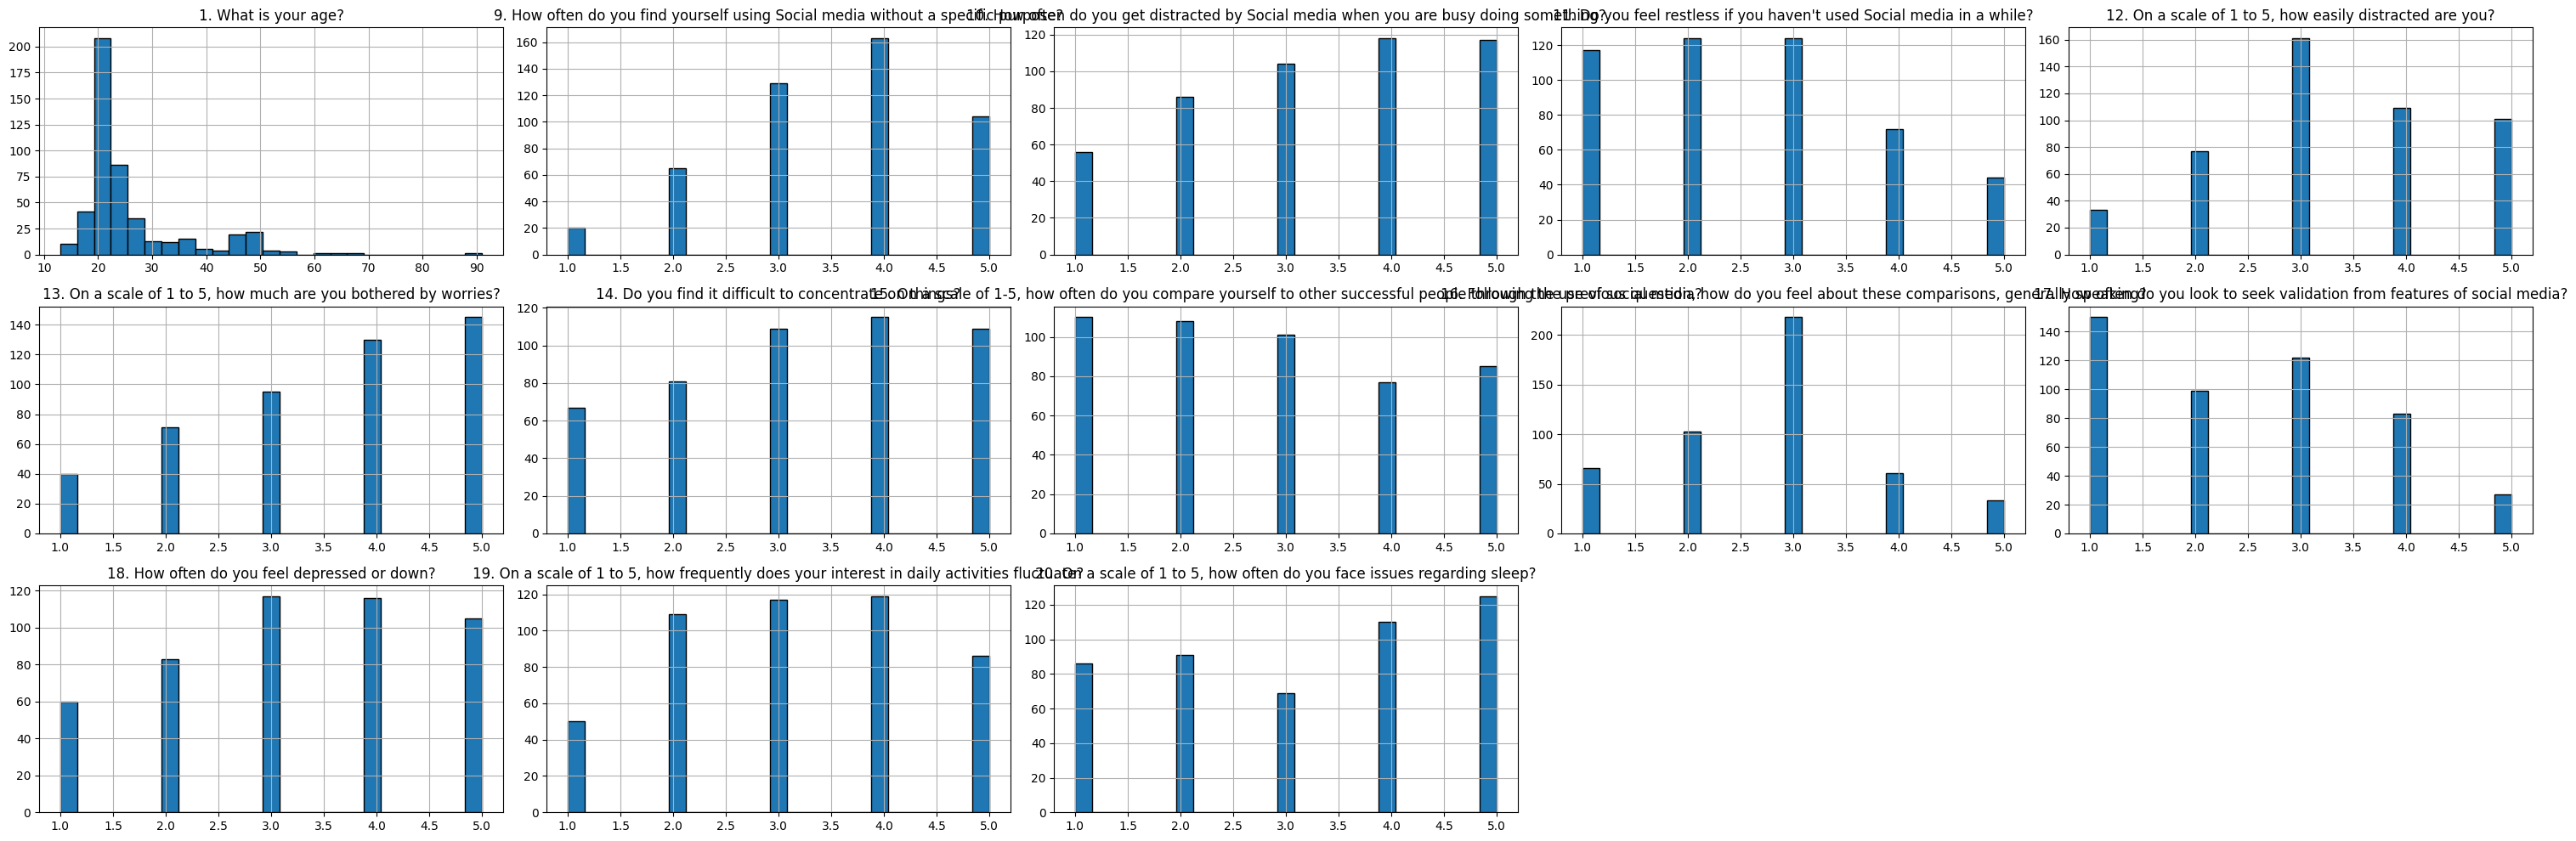

In [62]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(30, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

The histograms plotted above provide a visual overview of the distributions for the numerical features in the dataset. Here are the key observations:

Distribution Patterns:

Some features, such as "Age," exhibit a skewed distribution with more values clustered around the lower end (e.g., younger individuals).
Other features that capture user behaviors and emotions on a 1-5 scale (e.g., frequency of distraction, sleep issues, validation seeking) display distributions that appear somewhat uniform or evenly spread across all response levels.
Balanced Responses:

A number of the behavioral features (such as responses to "distraction" or "validation-seeking behavior") do not show extreme bias toward one particular value, which suggests that participants provided a variety of responses across the available scales.

6. Do you use social media?                               0.993763
4. Occupation Status                                      0.607069
3. Relationship Status                                    0.592516
2. Gender                                                 0.546778
5. What type of organizations are you affiliated with?    0.496881
dtype: float64

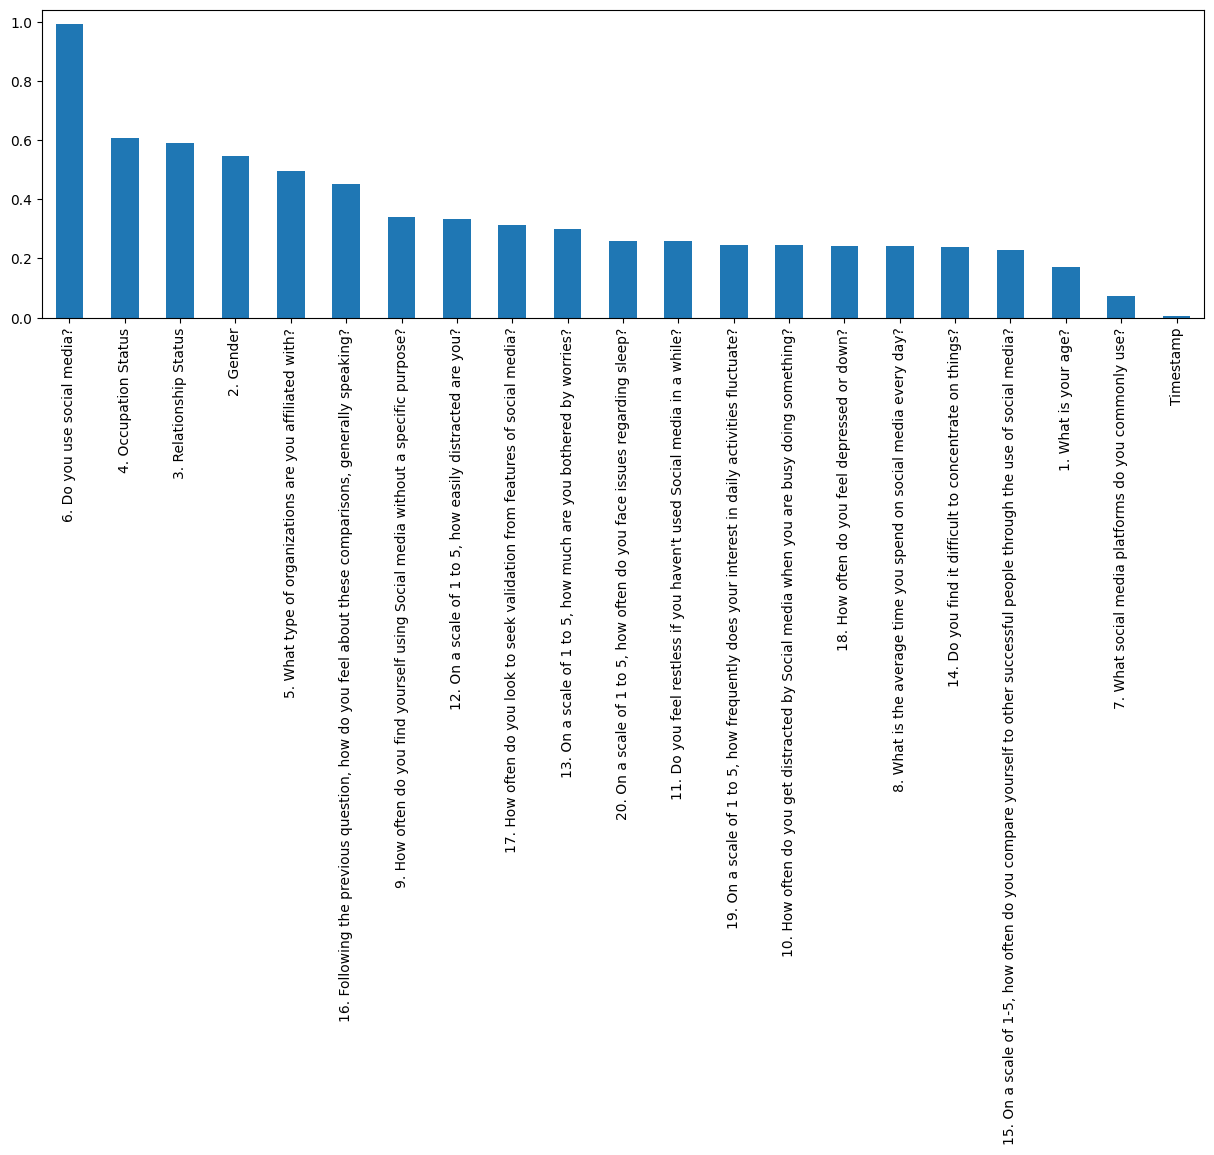

In [65]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode().iloc[0]

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

Skewed Value Distributions
Certain numerical features in the dataset display non-normal distributions, which is important to consider before conducting further analysis or building models. For example:

Age: The distribution is right-skewed, with a large concentration of respondents around younger age groups.
Recommendation: A log transformation or box-cox transformation may help normalize the data and improve model performance.
Frequency of distraction by social media: This feature also shows skewness, with more individuals reporting high levels of distraction (closer to the higher end of the scale). This could suggest that distraction is a common issue among respondents.

## 3.2. Feature patterns
In this section, we investigate feature-specific patterns within the dataset to identify potential issues and relationships that might affect further analysis. This step aims to answer two key questions:

Do some entries need to be dropped or modified based on feature patterns?
Can we identify relationships between features to gain a better understanding of the dataset?
Before diving into these questions, let's take a closer look at some key features and their distributions.

C:\Users\razan\AppData\Local\Temp\ipykernel_11196\3033442690.py:9: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


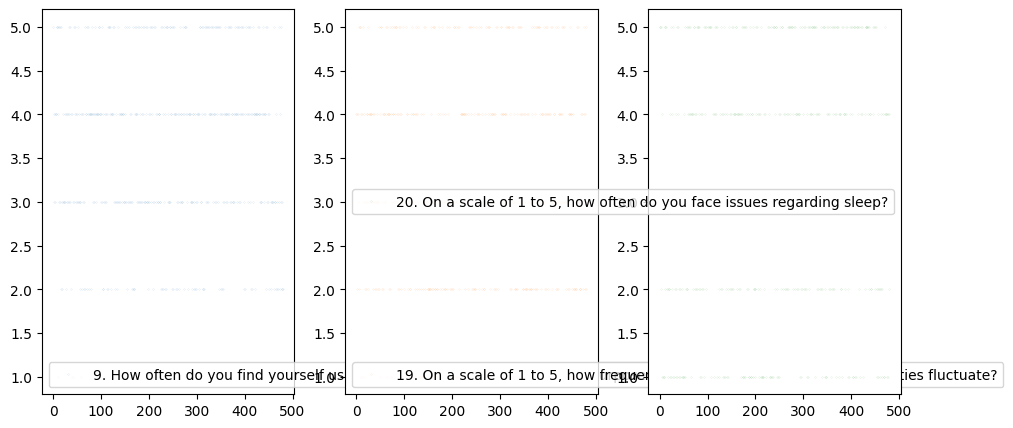

In [79]:
df_X[[
    "8. What is the average time you spend on social media every day?",
    "9. How often do you find yourself using Social media without a specific purpose?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
]].plot(
    lw=0, marker=".", subplots=True, layout=(1, 4), markersize=0.1, figsize=(15, 5)
)
plt.tight_layout()
plt.show()


In our analysis, we focused on four selected features that exhibit discrete value distributions. Each of these features contains a limited set of unique values, indicating that they represent categorical or ordinal data rather than continuous measurements. For example, responses to the questions regarding the average time spent on social media and frequency of usage without a specific purpose are confined to whole numbers, such as 1, 2, or 3, which further emphasizes their discrete nature.

This discrete nature of the features allows us to identify clear patterns and trends within the data, such as popular response categories or frequent behaviors among respondents. Since all four features fall into this category, we can approach our analysis by employing techniques suitable for categorical data, such as chi-square tests for independence or ordinal logistic regression, depending on the relationship we wish to explore.

Additionally, understanding these discrete distributions can help us recognize potential biases or common behaviors within our dataset, leading to insights about how different segments of the population interact with social media. This knowledge will be instrumental in guiding our further analysis and potential recommendations based on the observed patterns.


In [81]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25
print(cols_continuous)

1. What is your age?                                                                                                     True
9. How often do you find yourself using Social media without a specific purpose?                                        False
10. How often do you get distracted by Social media when you are busy doing something?                                  False
11. Do you feel restless if you haven't used Social media in a while?                                                   False
12. On a scale of 1 to 5, how easily distracted are you?                                                                False
13. On a scale of 1 to 5, how much are you bothered by worries?                                                         False
14. Do you find it difficult to concentrate on things?                                                                  False
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?  

Note that there is one continuous feature, which is age. the continuous nature of age enables in-depth analyses, such as age distribution trends and correlations with social media usage behaviors. This feature serves as a key demographic variable that can influence other aspects of the dataset, helping us to segment and analyze results by age groups.

In [82]:
# Creates mask to identify numerical features with less than 25 unique features (discrete features)
cols_discrete = df_X.select_dtypes(include="number").nunique() < 25

# Display the discrete features
print(cols_discrete)


1. What is your age?                                                                                                    False
9. How often do you find yourself using Social media without a specific purpose?                                         True
10. How often do you get distracted by Social media when you are busy doing something?                                   True
11. Do you feel restless if you haven't used Social media in a while?                                                    True
12. On a scale of 1 to 5, how easily distracted are you?                                                                 True
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          True
14. Do you find it difficult to concentrate on things?                                                                   True
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?  

  We note that all features except age are discrete. The discrete features provide valuable insights into specific behaviors and emotional states related to social media usage. They facilitate categorical analysis, allowing us to investigate patterns, frequency distributions, and relationships between social media interactions and reported experiences. This information can be leveraged to draw conclusions about user engagement, mental health implications, and behavioral trends among different demographic groups.

### 3.2.1. Continuous Features
In this analysis, we identify that there is only one continuous feature in our dataset, which is age. This limitation impacts our ability to explore complex relationships typically assessed through multiple continuous features.

In [85]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape


(481, 1)

###3.2.2. Discrete and ordinal features
Finding patterns in discrete or ordinal features can be a bit trickier. In this step, we focus on identifying and analyzing these features within our dataset. Given that they can exhibit unique patterns and distributions, we will select relevant columns for investigation. By leveraging visualizations from libraries like pandas and seaborn, we aim to uncover insights and relationships in the data, thereby enhancing our understanding of these categorical variables.

In [86]:
# Create a new dataframe that contains only the discrete features
df_discrete = df_X[cols_discrete[cols_discrete].index]

# Display the shape of the new dataframe
print(df_discrete.shape)

(481, 12)


Given our dataset contains 481 samples and 12 features, we have a manageable amount of data to analyze. In this step, we will focus on investigating the discrete numeric features within the dataset. Since our goal is to understand relationships between these features, we will calculate the Spearman correlation matrix, which measures monotonic associations.

To effectively visualize these correlations, we use Seaborn's heatmap function. Additionally, we apply a mask to hide the upper triangle of the matrix to avoid redundant information. This analysis will help us identify features that exhibit positive or negative monotonic trends, revealing any notable patterns in the dataset.

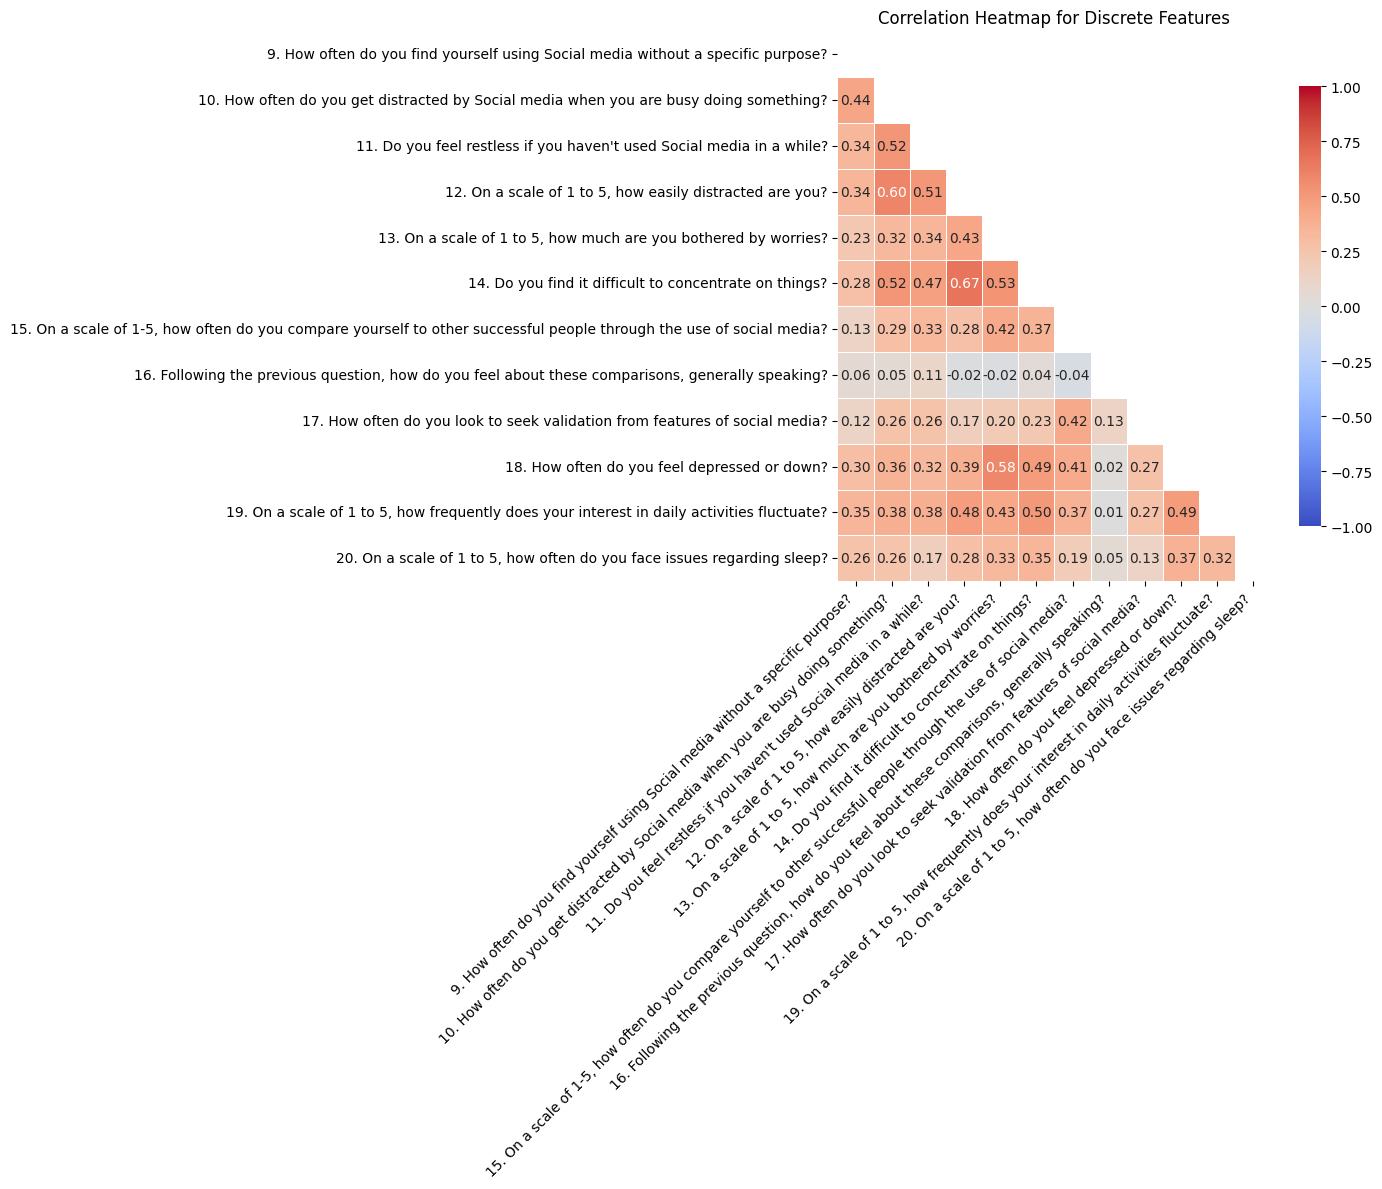

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_X is your original DataFrame with all features

# Drop the 'age' column and keep only numeric columns for correlation
df_discrete = df_X.drop(columns=['1. What is your age?'], errors='ignore')

# Ensure only numeric data is kept (this will exclude non-numeric columns)
df_discrete_numeric = df_discrete.select_dtypes(include=[np.number])

# Check if there are numeric columns to proceed
if df_discrete_numeric.empty:
    print("No numeric columns found for correlation.")
else:
    # Compute the Spearman correlation matrix
    df_corr_discrete = df_discrete_numeric.corr(method='spearman')

    # Create a mask to hide the upper triangle of the matrix
    mask = np.triu(np.ones_like(df_corr_discrete, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        df_corr_discrete, 
        mask=mask, 
        annot=True, 
        cmap='coolwarm', 
        vmin=-1, vmax=1, 
        fmt='.2f', 
        linewidths=0.5, 
        cbar_kws={"shrink": 0.8}
    )
    plt.title("Correlation Heatmap for Discrete Features")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



The heatmap reveals moderate positive relationships between certain features, but the overall correlations are generally weak to moderate. There are no strong negative correlations, indicating that the features tend to be either weakly associated or positively linked. This suggests that most features operate independently or share limited monotonic trends.

C:\Users\razan\AppData\Local\Temp\ipykernel_11196\336848879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_X, x=col, y=df_X["1. What is your age?"], ax=ax,
C:\Users\razan\AppData\Local\Temp\ipykernel_11196\336848879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_X, x=col, y=df_X["1. What is your age?"], ax=ax,
C:\Users\razan\AppData\Local\Temp\ipykernel_11196\336848879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_X, x=col, y=df_X["1. What is your age?"], ax=ax,
C:\Users\razan\AppData\Local\Te

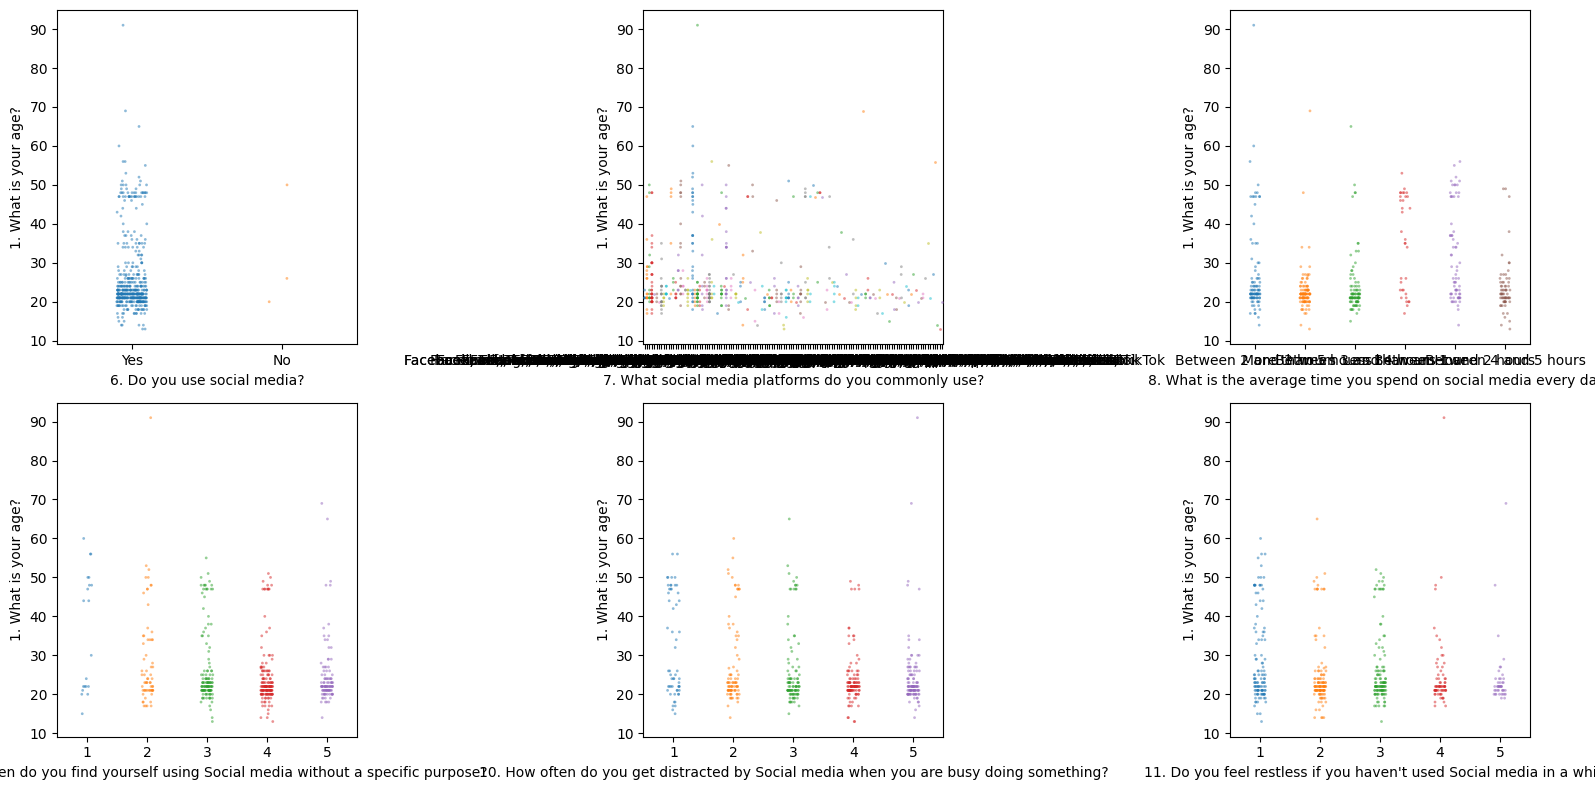

In [93]:
# Specify features of interest
selected_features = [
    "6. Do you use social media?",
    "7. What social media platforms do you commonly use?",
    "8. What is the average time you spend on social media every day?",
    "9. How often do you find yourself using Social media without a specific purpose?",
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "11. Do you feel restless if you haven't used Social media in a while?"
]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `age`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["1. What is your age?"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();


These kinds of plots are already very informative, as they provide a clear visual representation of the distribution of each discrete feature against the chosen continuous variable. By observing the spread and density of points for each category, we can identify patterns, trends, and potential outliers within the data. This visualization helps us understand how the selected features interact and allows us to draw insights about the relationships between different variables. Furthermore, such plots can highlight any less frequent categories, enabling us to focus our analysis on areas that may require further exploration or consideration.

## 3.3. Feature relationships

Last but not least, let's examine the relationships between features, specifically focusing on how they correlate. Understanding these correlations is crucial as it can reveal important insights about the interactions between different variables in our dataset. The quickest way to accomplish this is by utilizing pandas' .corr() function. This function allows us to compute a correlation matrix for all numerical features, providing a comprehensive overview of the strength and direction of the relationships between them. By analyzing this matrix, we can identify pairs of features that are strongly correlated, which may inform further analysis or model selection.

In [104]:
# Computes feature correlation using Spearman method
df_corr = df_continuous.corr(method="spearman")
print(df_corr)

                      1. What is your age?
1. What is your age?                   1.0


 Given this setup, it may be more appropriate to use the Spearman method instead of the Pearson method for computing the correlation. The Spearman correlation assesses the monotonic relationship between variables based on their ranked values, making it suitable for analyzing relationships involving ordinal or discrete features. To facilitate the interpretation of our correlation matrix, we will visualize it using Seaborn's .heatmap() function, which will help highlight any significant patterns in the relationships between our features.

In [2]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

NameError: name 'df_corr' is not defined

The results provide valuable insights into how different social media platforms relate to user behavior and perceptions. The negative correlations, particularly with specific platforms and general social media usage, could inform strategies for understanding user engagement and targeting specific demographics effectively. Moreover, the positive correlations suggest trends that could be further explored for tailored content and marketing strategies.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_ is your original DataFrame with all features

# Drop the 'age' column since it is continuous
df_discrete = df_.drop(columns=['1. What is your age?'], errors='ignore')

# Compute the Spearman correlation matrix for discrete features
df_corr_discrete = df_discrete.corr(method='spearman')

# Create a mask to hide the upper triangle of the matrix
mask = np.triu(np.ones_like(df_corr_discrete, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr_discrete, 
    mask=mask, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap for Discrete Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'df_' is not defined

### Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:
using summary_stats() function. From these summary statistics, several key observations can be made:

- Age: The ages of respondents range from 13 to 91 years, with an average age of 26.14. Most individuals are concentrated around the younger demographic, as seen from the 25th to 75th percentile values (21–26 years). The presence of a maximum age of 91 indicates a broad range, but the majority of responses are from younger individuals.

- Social Media Usage Without Specific Purpose: Responses range from 1 to 5, with a mean of 3.55, indicating that many individuals frequently use social media without a specific purpose. Most responses fall within the 3 to 4 range, suggesting a tendency toward casual, purposeless browsing.

- Distraction by Social Media: With a mean of 3.32, many individuals get distracted by social media while busy. The data shows variation, as the responses span the full scale from 1 to 5, with the majority clustered between 2 and 4.

- Restlessness Without Social Media: The mean is 2.59, indicating that while some feel restless without social media, the overall restlessness is moderate, with most responses ranging between 2 and 3.

- Ease of Distraction: On a scale of 1 to 5, the average score is 3.35, showing that most individuals find themselves moderately to highly distracted, as the majority of responses fall between 3 and 4.

- Worries: With a mean of 3.56, most respondents experience worries to a moderate to high degree, as responses are skewed towards 4 and 5.

- Difficulty in Concentrating: The mean score of 3.25 indicates that many individuals find it somewhat challenging to concentrate, with responses ranging widely from 1 to 5 but concentrated between 3 and 4.

- Comparing to Successful People on Social Media: The mean score of 2.83 suggests that respondents sometimes compare themselves to others on social media, but the overall tendency isn’t extreme. Responses are fairly distributed across the scale.

- Feelings About Comparisons: With a mean of 2.78, most people have moderate feelings regarding comparisons made on social media. The responses are clustered mainly around 2 and 3.

- Seeking Validation on Social Media: The mean score of 2.46 suggests that, on average, individuals seek validation from social media less frequently, though there is variation, with responses spanning from 1 to 5.

- Feelings of Depression: With a mean of 3.26, individuals report feeling down or depressed fairly often, as responses cluster between 3 and 4.

- Fluctuations in Interest in Daily Activities: The mean score is around 3, indicating that respondents sometimes experience fluctuating interest in daily activities, though there is some variability in how frequently this occurs.

In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
df = pd.read_csv('SecondaryData.csv')
summary_stats=df.describe();
print(summary_stats);

       1. What is your age?  \
count             481.00000   
mean               26.13659   
std                 9.91511   
min                13.00000   
25%                21.00000   
50%                22.00000   
75%                26.00000   
max                91.00000   

       9. How often do you find yourself using Social media without a specific purpose?  \
count                                         481.000000                                  
mean                                            3.553015                                  
std                                             1.096299                                  
min                                             1.000000                                  
25%                                             3.000000                                  
50%                                             4.000000                                  
75%                                             4.000000                           

### Show the Variance:
Variance helps understand the extent of dispersion or scatter of values in each column. As the variance increases, it indicates that the values are more spread out and scattered away from the mean, whereas decreasing variance suggests that the values are less scattered and closer to the mean value. Therefore, our variance results indicate:


- Age: The variance is 98.31, which indicates a high level of dispersion and spread of ages. This suggests that the age distribution in the dataset is wide, with respondents of varying ages.

- Social Media Usage Without Specific Purpose: The variance is 1.20, indicating a relatively low dispersion in responses. Most individuals show similar tendencies in using social media without a specific purpose, suggesting a convergence around the mean.

- Distraction by Social Media: The variance is 1.76, indicating moderate dispersion. This suggests that individuals' responses vary significantly in how often they get distracted by social media, but not extremely.

- Restlessness Without Social Media: The variance is 1.58, indicating moderate dispersion. Responses are somewhat spread out, suggesting that individuals vary in how restless they feel without social media.

- Ease of Distraction: With a variance of 1.38, there is relatively low dispersion, suggesting that most people report similar levels of distraction.

- Bothered by Worries: The variance is 1.65, indicating moderate variation. Individuals have varying levels of concern or worry.

- Difficulty Concentrating: The variance is 1.81, suggesting that the dispersion is moderate, with individuals showing different levels of difficulty concentrating.

- Comparison to Successful People on Social Media: The variance is 1.98, indicating a fairly high level of dispersion. This suggests that people differ widely in how often they compare themselves to others on social media.

- Feelings About Comparisons: The variance is 1.12, indicating a low level of dispersion. Most people have similar feelings about the comparisons they make on social media.

- Seeking Validation on Social Media: The variance is 1.56, indicating moderate dispersion. People vary in how often they seek validation from social media.

- Feelings of Depression: The variance is 1.72, indicating moderate dispersion in how often individuals feel depressed or down.

- Fluctuations in Interest in Daily Activities: The variance is 1.58, showing moderate variation in how frequently respondents experience fluctuations in their interest in daily activities.

- Issues Regarding Sleep: The variance is 2.14, indicating a relatively high level of dispersion. This suggests that people face varying degrees of sleep-related issues.

In summary, the variance is moderate to high across most variables, indicating diverse responses. Age stands out with a very high variance, while responses to feelings about comparisons show lower variability.

In [30]:

variance= df.var(numeric_only=True);
print(variance)

1. What is your age?                                                                                                    98.309408
9. How often do you find yourself using Social media without a specific purpose?                                         1.201871
10. How often do you get distracted by Social media when you are busy doing something?                                   1.763947
11. Do you feel restless if you haven't used Social media in a while?                                                    1.580198
12. On a scale of 1 to 5, how easily distracted are you?                                                                 1.381921
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          1.647003
14. Do you find it difficult to concentrate on things?                                                                   1.814692
15. On a scale of 1-5, how often do you compare yourself to other successful people throug

## Data Visualization Plan for Social Media Usage and Distraction Dataset
 The goal of this analysis is to visualize key variables from the dataset related to social media usage, distraction impacts, and demographic information. We aim to uncover patterns and insights that will help understand how different demographic groups interact with social media and how it impacts their focus and behavior. Below is a breakdown of the visualizations to be generated:

In [31]:
#import reqiuere librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

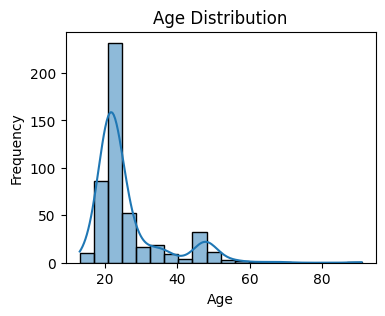

In [32]:
#1 Age Distribution
plt.figure(figsize=(4, 3))
sns.histplot(df['1. What is your age?'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


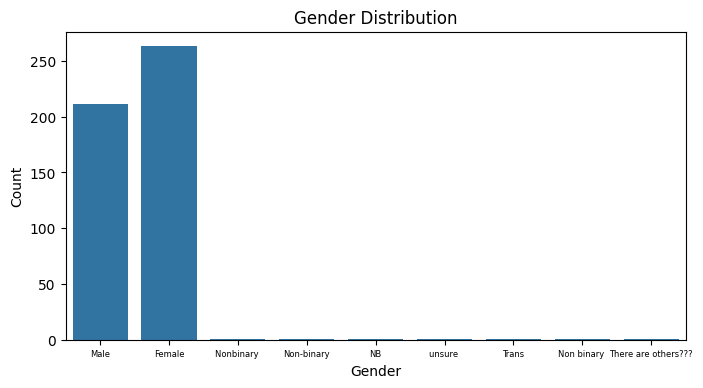

In [117]:
#2 Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='2. Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(fontsize=6)
plt.show()


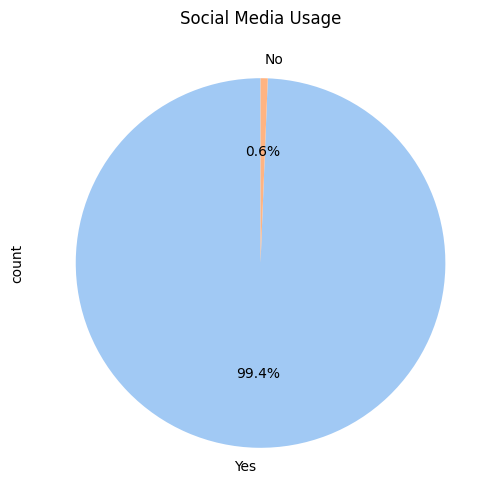

In [33]:
#3 Social Media Usage
social_media_usage_counts = df['6. Do you use social media?'].value_counts()

plt.figure(figsize=(6, 6))
social_media_usage_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Social Media Usage')
plt.show()


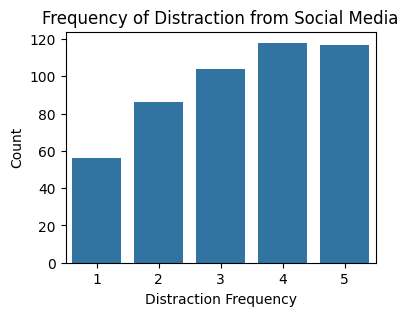

In [35]:
#4 Frequency of Distraction from Social Media
plt.figure(figsize=(4, 3))
sns.countplot(x='10. How often do you get distracted by Social media when you are busy doing something?', data=df)
plt.title('Frequency of Distraction from Social Media')
plt.xlabel('Distraction Frequency')
plt.ylabel('Count')
plt.show()


## Data cleaning \

### Step:1 Handling Irrelevant Features
In this step, we checked for irrelevant features using variance as an indicator. Features with very low variance may not provide useful differentiation and could introduce noise into the analysis. Based on the variance results, we determined which features to keep or remove to enhance the reliability and relevance of the data.

High Variance (e.g., Age, Issues Regarding Sleep, Comparison to Successful People on Social Media): High variance usually indicates that the feature has a wide range of values, meaning it captures diverse responses and is likely valuable for analysis.

Moderate Variance (e.g., Distraction by Social Media, Feelings of Depression, Seeking Validation on Social Media): Moderate variance suggests that responses are varied enough to provide useful information, though there is some consistency. These features are generally still important.

Low Variance (e.g., Social Media Usage Without Specific Purpose, Feelings About Comparisons): Low variance indicates that most respondents gave similar answers, meaning the feature might not contribute much to distinguishing between individuals. However, low variance doesn't automatically mean the feature is irrelevant. It depends on the context and how critical the feature is to the analysis goals.

#### Are there irrelevant features?
Low-variance features might be considered irrelevant if they provide little differentiation. For example, "Feelings About Comparisons" has a variance of 1.12, but this does align with the analysis goals, so it couldn't potentially be dropped.

##### Conclusion:
No immediate irrelevance is apparent from just variance analysis alone so we are going to keep them

### Step 2: Handling Outlier:
In this step, we check for outliers values in each the numeric column in the dataset.
Outliers, by definition, are values that fall far from the central trend of the data. 
and we did choose the IQR method based on our dataset to identify how many outliers.

In [40]:
import pandas as pd
data = pd.read_csv('CleanedData.csv')
import numpy as np
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
1. What is your age?: 84 rows with outliers
9. How often do you find yourself using Social media without a specific purpose?: 20 rows with outliers
10. How often do you get distracted by Social media when you are busy doing something?: 0 rows with outliers
11. Do you feel restless if you haven't used Social media in a while?: 44 rows with outliers
12. On a scale of 1 to 5, how easily distracted are you?: 33 rows with outliers
13. On a scale of 1 to 5, how much are you bothered by worries?: 0 rows with outliers
14. Do you find it difficult to concentrate on things?: 0 rows with outliers
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?: 0 rows with outliers
16. Following the previous question, how do you feel about these comparisons, generally speaking?: 33 rows with outliers
17. How often do you look to seek validation from features of social media?: 0 rows with outliers
18. How often do you feel depress

 Age Outlier Handling:

Initially, I applied the Interquartile Range (IQR) method to detect outliers in the "Age" column. However, I realized that not all outliers are errors. For example, ages like 34, 35, and 50 are perfectly valid and should not necessarily be treated as outliers. Therefore, using the IQR method for age could unjustifiably flag reasonable data points.

To ensure fairness and accuracy in the analysis, I decided to use a filtering method instead. I set the acceptable age range to be between 10 and 75. This approach is more balanced and ensures that only clearly invalid or outlier data points are handled appropriately.

Upon filtering, I found that there was only one outlier—a single respondent with an age of 91. Given that this was an isolated case, I decided to remove the outlier from the dataset, as its impact on the overall analysis would be minimal.

In [41]:
import pandas as pd

# Filter the data to include only ages between 10 and 75
df_filtered = df_raw[(df_raw['1. What is your age?'] >= 10) & (df_raw['1. What is your age?'] <= 75)]

# Find the outliers (ages less than 10 or greater than 75)
outliers = df_raw[(df_raw['1. What is your age?'] < 10) | (df_raw['1. What is your age?'] > 75)]

# Display the number of outliers
print(f"Number of outliers in age: {len(outliers)}")

# If you want to display the outliers themselves
print("Outliers:")
print(outliers[['1. What is your age?']])

# Show statistics of the filtered data
print("Statistics of the filtered ages (between 10 and 75):")
print(df_filtered['1. What is your age?'].describe())


Number of outliers in age: 1
Outliers:
     1. What is your age?
256                  91.0
Statistics of the filtered ages (between 10 and 75):
count    480.000000
mean      26.001458
std        9.471690
min       13.000000
25%       21.000000
50%       22.000000
75%       26.000000
max       69.000000
Name: 1. What is your age?, dtype: float64


In [42]:
# remove outlier from age column which is one outlier.
import pandas as pd

# Update the original DataFrame by removing ages outside the range of 10-75
df_raw = df_raw[(df_raw['1. What is your age?'] >= 10) & (df_raw['1. What is your age?'] <= 75)]

# Save the updated DataFrame to the same file 'CleanedData.csv'
df_raw.to_csv('CleanedData.csv', index=False)

# Display statistics of the filtered data
print("Statistics of the filtered ages (between 10 and 75):")
print(df_raw['1. What is your age?'].describe())


Statistics of the filtered ages (between 10 and 75):
count    480.000000
mean      26.001458
std        9.471690
min       13.000000
25%       21.000000
50%       22.000000
75%       26.000000
max       69.000000
Name: 1. What is your age?, dtype: float64


### Dealing with the rest of the outliers :
Likert scale outliers like 1 or 5 are typically valid responses and shouldn\'t be removed, so i decide leave these values 
as they are and save dataset without removing them

### Checking the Results by Counting Outliers After Handling Them
After carefully reviewing the outliers detected in the dataset, I focused on the age column as it contained a genuine outlier. Upon inspection, I found that the other columns flagged as having outliers (especially those based on a Likert scale from 1 to 5) did not actually contain true outliers. These values, such as 1 and 5, represent valid responses on the scale and are not considered outliers from a data quality perspective.

Therefore, I decided that no further action was necessary for the Likert scale columns, as the values flagged were not errors but rather legitimate extremes of the scale. The only column where an outlier required handling was the age column, where values outside the reasonable range were filtered.

In [43]:
# checking for age column outlier
import pandas as pd

# Filter the data to include only ages between 10 and 75
df_filtered = df_raw[(df_raw['1. What is your age?'] >= 10) & (df_raw['1. What is your age?'] <= 75)]

# Find the outliers (ages less than 10 or greater than 75)
outliers = df_raw[(df_raw['1. What is your age?'] < 10) | (df_raw['1. What is your age?'] > 75)]

# Display the number of outliers
print(f"Number of outliers in age: {len(outliers)}")


Number of outliers in age: 0



## Data Preprocessing 

###  Encoding:
We applied encoding to the 'Gender' column, converting it into numerical values. In this case, we replaced "Male" with 0 and "Female" with 1. Encoding categorical variables into numerical format is essential because machine learning models generally work with numerical data, interpreting numbers more effectively than text labels.

In [7]:
import pandas as pd

# Load the dataset
df_raw = pd.read_csv('CleanedData.csv')

# Encode 'Gender' column: assuming "Male" = 0 and "Female" = 1
df_raw['2. Gender'] = df_raw['2. Gender'].replace({'Male': 0, 'Female': 1})

print("DataFrame after Gender Encoding:")
print(df_raw[['2. Gender']].head())


DataFrame after Gender Encoding:
  2. Gender
0         0
1         1
2         1
3         1
4         1


In [64]:
import pandas as pd

# Load the Sec.csv file
file_path = "Sec.csv"
df = pd.read_csv(file_path)

# Column name for social media time
column_name = '8. What is the average time you spend on social media every day?'

# Mapping dictionary for converting time intervals to numeric values
mapping_dict = {
    "Less than an Hour": 0.5,
    "Between 1 and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "Between 4 and 5 hours": 4.5,
    "More than 5 hours": 6
}

# Apply encoding directly on the existing column
df[column_name] = df[column_name].map(mapping_dict)

# Save the updated DataFrame back to the file
saved = 'Sec.csv'
df.to_csv(saved, index=False)

# Reload the file to ensure everything is updated
df_reloaded = pd.read_csv(saved)

# Display the first few rows to verify the result
print(df_reloaded.head(6))  

   1. What is your age?  2. Gender  3. Relationship Status  \
0                    21          0                       1   
1                    21          1                       3   
2                    21          1                       3   
3                    21          1                       3   
4                    21          1                       3   
5                    22          1                       3   

   4. Occupation Status  \
0                     3   
1                     3   
2                     3   
3                     3   
4                     3   
5                     3   

   5. What type of organizations are you affiliated with?  \
0                                                 10        
1                                                 10        
2                                                 10        
3                                                 10        
4                                                 10        
5        

In [98]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataframe
df = pd.read_csv('Sec.csv')

# Initialize the OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse

# Fit and transform the specific column to one-hot encoding
encoded_values = encoder.fit_transform(df[['5. What type of organizations are you affiliated with?']])

# Convert the result into a DataFrame
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['5. What type of organizations are you affiliated with?']))

# Drop the original column from the dataframe
df = df.drop('5. What type of organizations are you affiliated with?', axis=1)

# Concatenate the one-hot encoded columns back to the dataframe
df = pd.concat([df, encoded_df], axis=1)

# Save the updated dataframe to a new CSV file
df.to_csv('Sec.csv', index=False)

# Print confirmation
print("One-hot encoding applied and saved to Sec.csv")


One-hot encoding applied and saved to Sec.csv


## Data Type Conversion: Age Column
In this step, the 'Age' column was converted to an integer data type using the astype(int) function. This ensures that the values in the 'Age' column are in the correct format for further analysis and machine learning model training, as models often require numerical inputs in specific formats (such as integers).

In [9]:
# Convert 'Age' column to integer
df_raw['1. What is your age?'] = df_raw['1. What is your age?'].astype(int)

print("DataFrame after converting Age to integer:")
print(df_raw[['1. What is your age?']].head())
# Save the preprocessed data to a new CSV file
df_raw.to_csv('PreprocessingData.csv', index=False)

print("Data saved to 'PreprocessingData.csv'.")


DataFrame after converting Age to integer:
   1. What is your age?
0                    21
1                    21
2                    21
3                    21
4                    21
Data saved to 'PreprocessingData.csv'.


In [1]:
import pandas as pd

# Load the cleaned data
df_raw = pd.read_csv('CleanedData.csv')

# Column name for social media time
column_name = '8. What is the average time you spend on social media every day?'

# Mapping dictionary for converting time intervals to numeric values
mapping_dict = {
    "Less than an Hour": 0.5,
    "Between 1 and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "Between 4 and 5 hours": 4.5,
    "More than 5 hours": 6
}

# Map the time intervals to their numeric values using the dictionary
df_raw['Time_Spent_Numeric'] = df_raw[column_name].map(mapping_dict)

# Get summary statistics
summary_stats = df_raw['Time_Spent_Numeric'].describe()

# Save the modified DataFrame to a new CSV file
df_raw.to_csv('PreprocessingData.csv', index=False)

# Output the summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
count    480.000000
mean       3.531250
std        1.756308
min        0.500000
25%        2.500000
50%        3.500000
75%        4.500000
max        6.000000
Name: Time_Spent_Numeric, dtype: float64


This step converted qualitative responses on daily social media usage into numeric values to enable statistical analysis and improve data quality, and the updated dataset was saved as PreprocessingData.csv.

### Decisions Made:
During the preprocessing stage, several important decisions were made to ensure the dataset's integrity and usability. The first key decision was identifying and removing outliers, particularly in the age column. We found that some age values were unrealistic, such as those exceeding 75 years. These values were considered outliers and removed them. Additionally, normalization was applied to the numerical features using decimal scaling. This technique helped transform values, like responses on a scale from 1 to 5, into a uniform range between 0 and 1, making them easier to compare. Finally, a thorough data integrity check was performed to ensure the dataset was complete and free from missing values. All entries were reviewed to confirm that every question was answered without any gaps or inconsistencies.

### Rationale Behind Decisions:
The rationale for these decisions was primarily to ensure the dataset was both accurate and usable for further analysis. Outliers, such as extreme age values, can distort results, leading to inaccurate insights. By removing or correcting them, we improved the data's overall reliability. Normalization was necessary to put all numerical responses on a comparable scale. For example, survey responses ranging from 1 to 5 had to be normalized so that no single variable would dominate the others during analysis. This step was essential for ensuring that all features contributed equally to any models or further statistical evaluations. The data integrity check was crucial to maintaining consistency, as missing data can introduce bias and affect the quality of the analysis.

### Challenges:
Several challenges arose during the preprocessing phase. One major challenge was accurately identifying outliers. In particular, extreme values like very high ages required careful evaluation to determine whether they were errors or genuine cases. To resolve this, we used statistical techniques, such as interquartile range (IQR) analysis, to differentiate between valid outliers and erroneous data points. Another challenge was ensuring that the normalization process did not obscure or distort important patterns. For example, responses rated as a 5 on a 1-to-5 scale had to retain their relative importance after normalization. To overcome this, we applied decimal scaling carefully, ensuring the original relationships within the data remained intact. Finally, handling the different question types, such as categorical and numerical responses, was a challenge. We kept the categorical data in its original form while only applying normalization to numerical values, ensuring that no important information was lost or improperly transformed.